<a href="https://colab.research.google.com/github/MathewLipman/Work-Samples/blob/main/Effective_Pandas_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/vehicles.csv')

<ipython-input-3-908cd415f1f8>:1: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Dataset/vehicles.csv')


In [ ]:
df

barrels08  barrelsA08  charge120  charge240  city08  city08U  cityA08  \
0      14.167143         0.0        0.0        0.0      19      0.0        0   
1      27.046364         0.0        0.0        0.0       9      0.0        0   
2      11.018889         0.0        0.0        0.0      23      0.0        0   
3      27.046364         0.0        0.0        0.0      10      0.0        0   
4      15.658421         0.0        0.0        0.0      17      0.0        0   
...          ...         ...        ...        ...     ...      ...      ...   
46181  13.523182         0.0        0.0        0.0      19      0.0        0   
46182  12.935217         0.0        0.0        0.0      20      0.0        0   
46183  14.167143         0.0        0.0        0.0      18      0.0        0   
46184  14.167143         0.0        0.0        0.0      18      0.0        0   
46185  16.528333         0.0        0.0        0.0      16      0.0        0   

       cityA08U  cityCD  cityE  ...  mfrCode  c240Dscr  charge240b  c240bDscr  \
0           0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
1           0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
2           0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
3           0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
4           0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
...         ...     ...    ...  ...      ...       ...         ...        ...   
46181       0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
46182       0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
46183       0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
46184       0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
46185       0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   

                          createdOn                    modifiedOn  startStop  \
0      Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013        NaN   
1      Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013        NaN   
2      Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013        NaN   
3      Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013        NaN   
4      Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013        NaN   
...                             ...                           ...        ...   
46181  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013        NaN   
46182  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013        NaN   
46183  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013        NaN   
46184  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013        NaN   
46185  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013        NaN   

       phevCity  phevHwy  phevComb  
0             0        0         0  
1             0        0         0  
2             0        0         0  
3             0        0         0  
4             0        0         0  
...         ...      ...       ...  
46181         0        0         0  
46182         0        0         0  
46183         0        0         0  
46184         0        0         0  
46185         0        0         0  

[46186 rows x 83 columns]

In [ ]:
make = df.make

Top 10 cars by volume

In [ ]:
import matplotlib.style as style
style.use('dark_background')

In [ ]:
import seaborn as sns

<Axes: >

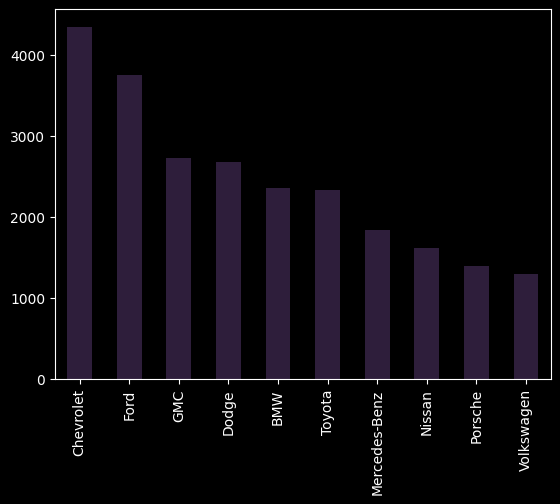

In [ ]:
sns.set_palette('mako')
make.value_counts()[0:10].plot(kind='bar')

We use index in our top10 variable because we only want the make names not values from our value_count.

Whey then use where and isin to identify values that match car makes from our top 10. If the name corresponds to a name in top 10 it is counted if it is not in the top 10 it is given the value other and bucketed with other non top 10 values as other. This allows us to see how much the top 10 is in respect to the rest of our sample.

<Axes: >

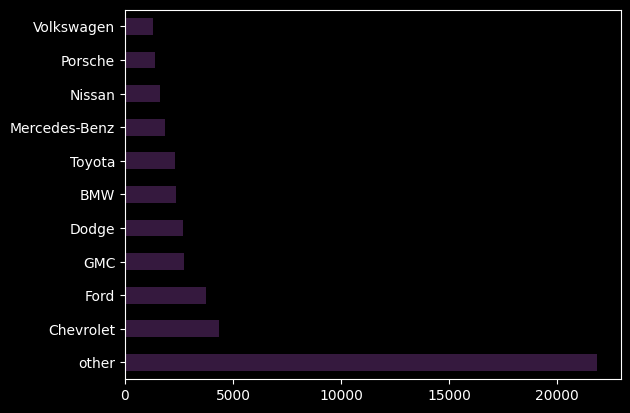

In [ ]:
sns.set_palette('rocket')
top10 = make.value_counts().index[0:10]
make.where(make.isin(top10), 'other').value_counts().plot(kind='barh')

This chart shows us that the most popular make, Chevrolet accounts for almost 10% of the entire sample.

<Axes: xlabel='percentage of total sample'>

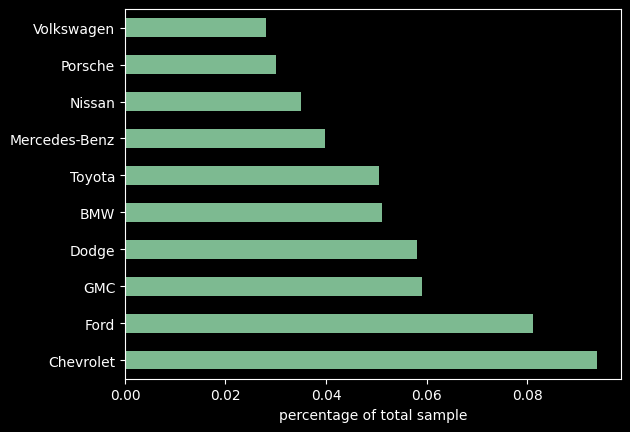

In [ ]:
sns.set_palette('crest')
(make.value_counts()[:10] / make.shape[0]).plot(kind='barh', xlabel='percentage of total sample')

the top10 makes represent 52.6% of the total sample

In [ ]:
(make.value_counts()[:10] / make.shape[0]).sum()

0.5267397046724116

When categories have an instrinic order they are referred to as ordinal. One common way to create categories is by binning numeric data.

In [ ]:
make.unique().shape[0]

142

a good way to identify is a column could be categorical is if you compare its cardinality (the amount of unique elements it contains) compared to its size. In this case we have 142 unique values that span 46186 rows. We could definetly set this to a category.

In [ ]:
make.nunique() / make.shape[0]

0.003074524747759061

In [ ]:
cat_make = make.astype('category')

In [ ]:
make.memory_usage(deep=True)

2925540

Converting to categories reduces memory usage by almost 2/3 this also speeds up our performance. Categorical computations are also faster in many cases (memory aside).

In [ ]:
cat_make.memory_usage(deep=True)

106350

Even a string operation that capitalizes all the letters is over 75% faster.

In [ ]:
%%timeit
cat_make.str.upper()

2.27 ms ± 445 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
%%timeit
make.str.upper()

36.6 ms ± 11.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


We are now using the unique values in make to create a categorical data type. We take maek and select only the unique values, we then sort them because want this category to be ordered alphabetically. We set our ordered value to True. This means order is relevant in this categorical dtype.

In [ ]:
make_type = pd.CategoricalDtype(sorted(make.unique()), ordered=True)

In [ ]:
make.index

RangeIndex(start=0, stop=46186, step=1)

In [ ]:
ordered_make = make.astype(make_type)
ordered_make

0        Alfa Romeo
1           Ferrari
2             Dodge
3             Dodge
4            Subaru
            ...    
46181        Subaru
46182        Subaru
46183        Subaru
46184        Subaru
46185        Subaru
Name: make, Length: 46186, dtype: category
Categories (142, object): ['AM General' < 'ASC Incorporated' < 'Acura' < 'Alfa Romeo' ... 'Volvo' <
                           'Wallace Environmental' < 'Yugo' < 'smart']

In [ ]:
cat_make

0        Alfa Romeo
1           Ferrari
2             Dodge
3             Dodge
4            Subaru
            ...    
46181        Subaru
46182        Subaru
46183        Subaru
46184        Subaru
46185        Subaru
Name: make, Length: 46186, dtype: category
Categories (142, object): ['AM General', 'ASC Incorporated', 'Acura', 'Alfa Romeo', ..., 'Volvo',
                           'Wallace Environmental', 'Yugo', 'smart']

In [ ]:
ordered_make

0        Alfa Romeo
1           Ferrari
2             Dodge
3             Dodge
4            Subaru
            ...    
46181        Subaru
46182        Subaru
46183        Subaru
46184        Subaru
46185        Subaru
Name: make, Length: 46186, dtype: category
Categories (142, object): ['AM General' < 'ASC Incorporated' < 'Acura' < 'Alfa Romeo' ... 'Volvo' <
                           'Wallace Environmental' < 'Yugo' < 'smart']

We can also specify the starting and ending values in other ways

In [ ]:
ordered_make.max()

'smart'

In [ ]:
make.max()

'smart'

In [ ]:
make.min()

'AM General'

In [ ]:
ordered_make.min()

'AM General'

In [ ]:
cat_make.cat

In [ ]:
 cat_make.cat.rename_categories([c.lower() for c in cat_make.cat.categories])

0        alfa romeo
1           ferrari
2             dodge
3             dodge
4            subaru
            ...    
46181        subaru
46182        subaru
46183        subaru
46184        subaru
46185        subaru
Name: make, Length: 46186, dtype: category
Categories (142, object): ['am general', 'asc incorporated', 'acura', 'alfa romeo', ..., 'volvo',
                           'wallace environmental', 'yugo', 'smart']

In [ ]:
ordered_make.cat.rename_categories({c:c.lower() for c in ordered_make})

0        alfa romeo
1           ferrari
2             dodge
3             dodge
4            subaru
            ...    
46181        subaru
46182        subaru
46183        subaru
46184        subaru
46185        subaru
Name: make, Length: 46186, dtype: category
Categories (142, object): ['am general' < 'asc incorporated' < 'acura' < 'alfa romeo' ... 'volvo' <
                           'wallace environmental' < 'yugo' < 'smart']

Now that everything is lower and sorted our max value is Yugo not 'smart'

In [ ]:
ordered_make.cat.reorder_categories(sorted(cat_make.cat.categories, key= str.lower))

0        Alfa Romeo
1           Ferrari
2             Dodge
3             Dodge
4            Subaru
            ...    
46181        Subaru
46182        Subaru
46183        Subaru
46184        Subaru
46185        Subaru
Name: make, Length: 46186, dtype: category
Categories (142, object): ['Acura' < 'Alfa Romeo' < 'AM General' <
                           'American Motors Corporation' ... 'Volvo' < 'VPG' < 'Wallace Environmental' < 'Yugo']

Be aware that when using categories in value counts and groupby it will return all possible category values even ones that are empty, they will be returned empty but will be included in the results. Below even thoug hwe called for value counts of only the first 100 entries the length is 142 as an example.

In [ ]:
ordered_make.iloc[:100].value_counts()

Dodge                        17
Oldsmobile                    8
Ford                          8
Buick                         7
Plymouth                      5
                             ..
Grumman Olson                 0
Grumman Allied Industries     0
Goldacre                      0
Geo                           0
smart                         0
Name: make, Length: 142, dtype: int64

Illustrating this with group by. It includes values that are not in both because of the category issue but there is a fix for this.

In [ ]:
(cat_make
.iloc[:100]
.groupby(cat_make.iloc[:100])
.first()
)

make
AM General                            NaN
ASC Incorporated                      NaN
Acura                                 NaN
Alfa Romeo                     Alfa Romeo
American Motors Corporation           NaN
                                  ...    
Volkswagen                     Volkswagen
Volvo                               Volvo
Wallace Environmental                 NaN
Yugo                                  NaN
smart                                 NaN
Name: make, Length: 142, dtype: category
Categories (142, object): ['AM General', 'ASC Incorporated', 'Acura', 'Alfa Romeo', ..., 'Volvo',
                           'Wallace Environmental', 'Yugo', 'smart']

For comparison this is how the output looks returned from using strings not categories in this comparison. Now we only see the makes that are part of the first 100 rows...

In [ ]:
(make
.iloc[:100]
.groupby(make.iloc[:100])
.first()
)

make
Alfa Romeo          Alfa Romeo
Audi                      Audi
BMW                        BMW
Buick                    Buick
CX Automotive    CX Automotive
Cadillac              Cadillac
Chevrolet            Chevrolet
Chrysler              Chrysler
Dodge                    Dodge
Ferrari                Ferrari
Ford                      Ford
Hyundai                Hyundai
Infiniti              Infiniti
Lexus                    Lexus
Mazda                    Mazda
Mercury                Mercury
Nissan                  Nissan
Oldsmobile          Oldsmobile
Plymouth              Plymouth
Pontiac                Pontiac
Rolls-Royce        Rolls-Royce
Subaru                  Subaru
Toyota                  Toyota
Volkswagen          Volkswagen
Volvo                    Volvo
Name: make, dtype: object

Observed = True in our groupby parameter solves this issue. This only includes results for which there are values)

In [ ]:
(cat_make
.iloc[:100]
.groupby(cat_make.iloc[:100], observed=True)
.first()
)

make
Alfa Romeo          Alfa Romeo
Ferrari                Ferrari
Dodge                    Dodge
Subaru                  Subaru
Toyota                  Toyota
Volkswagen          Volkswagen
Volvo                    Volvo
Audi                      Audi
BMW                        BMW
Buick                    Buick
Cadillac              Cadillac
Chevrolet            Chevrolet
Chrysler              Chrysler
CX Automotive    CX Automotive
Nissan                  Nissan
Ford                      Ford
Hyundai                Hyundai
Infiniti              Infiniti
Lexus                    Lexus
Mercury                Mercury
Mazda                    Mazda
Oldsmobile          Oldsmobile
Plymouth              Plymouth
Pontiac                Pontiac
Rolls-Royce        Rolls-Royce
Name: make, dtype: category
Categories (142, object): ['AM General', 'ASC Incorporated', 'Acura', 'Alfa Romeo', ..., 'Volvo',
                           'Wallace Environmental', 'Yugo', 'smart']

This function will take a series and take the top n numbe of values (5 if not specified) from value counts, create a set a new categorical type for that series and group anything that values out of the n top values in by default, 'other'

In [ ]:
def generalize_topn(ser, n=5, other='Other'):
  topn = ser.value_counts().index[:n]
  if isinstance(ser.dtype, pd.CategoricalDtype):
    ser = ser.cat.set_categories(
      topn.set_categories(list(topn)+[other]))
  return ser.where(ser.isin(topn), other)

Note we now have 21 categories, our top 20 + other ('NA') which contains all the other categories.

In [ ]:
cat_make.pipe(generalize_topn, n=20, other='NA')

0            NA
1            NA
2         Dodge
3         Dodge
4        Subaru
          ...  
46181    Subaru
46182    Subaru
46183    Subaru
46184    Subaru
46185    Subaru
Name: make, Length: 46186, dtype: category
Categories (21, object): ['Chevrolet', 'Ford', 'GMC', 'Dodge', ..., 'Volvo', 'Pontiac', 'Chrysler', 'NA']

This function will take a series, the values we want to map to that series and a default value for mappings that are not part of the new mappings.

In [ ]:
def generalize_mapping(ser, mapping, default):
  seen = None
  res = ser.astype(str)
  for old, new in mapping.items():
    mask = ser.str.contains(old)
    if seen is None:
      seen = mask
    else:
        seen |= mask
    res = res.where(~mask, new)
  res = res.where(seen, default)
  return res.astype('category')

in this example we map some of the US car makes and BMW to german. Any make that is not included is categorized as other.

In [ ]:
generalize_mapping(cat_make, {'Ford': 'US', 'Tesla': 'US', 'Chevrolet': 'US', 'Dodge': 'US',
'Oldsmobile': 'US', 'Plymouth': 'US','BMW': 'German'}, 'Other')

0        Other
1        Other
2           US
3           US
4        Other
         ...  
46181    Other
46182    Other
46183    Other
46184    Other
46185    Other
Name: make, Length: 46186, dtype: category
Categories (3, object): ['German', 'Other', 'US']

In [ ]:
df.columns

Index(['barrels08', 'barrelsA08', 'charge120', 'charge240', 'city08',
       'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2',
       'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U',
       'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'cylinders',
       'displ', 'drive', 'engId', 'eng_dscr', 'feScore', 'fuelCost08',
       'fuelCostA08', 'fuelType', 'fuelType1', 'ghgScore', 'ghgScoreA',
       'highway08', 'highway08U', 'highwayA08', 'highwayA08U', 'highwayCD',
       'highwayE', 'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4', 'make',
       'model', 'mpgData', 'phevBlended', 'pv2', 'pv4', 'range', 'rangeCity',
       'rangeCityA', 'rangeHwy', 'rangeHwyA', 'trany', 'UCity', 'UCityA',
       'UHighway', 'UHighwayA', 'VClass', 'year', 'youSaveSpend', 'guzzler',
       'trans_dscr', 'tCharger', 'sCharger', 'atvType', 'fuelType2', 'rangeA',
       'evMotor', 'mfrCode', 'c240Dscr', 'charge240b', 'c240bDscr',
       'createdOn', 'modifiedOn

In [ ]:
df.VClass.value_counts()

Compact Cars                          6290
Subcompact Cars                       5612
Midsize Cars                          5533
Large Cars                            2560
Two Seaters                           2369
Standard Pickup Trucks                2354
Sport Utility Vehicle - 4WD           2078
Small Station Wagons                  1725
Sport Utility Vehicle - 2WD           1627
Small Sport Utility Vehicle 4WD       1585
Minicompact Cars                      1551
Special Purpose Vehicles              1455
Standard Pickup Trucks 2WD            1411
Standard Pickup Trucks 4WD            1378
Standard Sport Utility Vehicle 4WD    1280
Vans                                  1141
Small Sport Utility Vehicle 2WD        925
Special Purpose Vehicle 2WD            734
Midsize-Large Station Wagons           656
Midsize Station Wagons                 585
Small Pickup Trucks                    538
Small Pickup Trucks 2WD                502
Standard Sport Utility Vehicle 2WD     440
Vans, Cargo

In [ ]:
vclass = df.VClass.astype('category')

In [ ]:
df.VClass.memory_usage(deep=True)

3478296

85% reduction in memory.

In [ ]:
vclass.memory_usage(deep=True)

50056

In [ ]:
%%timeit
df.VClass.str.lower()

The slowest run took 5.40 times longer than the fastest. This could mean that an intermediate result is being cached.
18.2 ms ± 14.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


20x faster string manipulation

In [ ]:
%%timeit
vclass.str.lower()

621 µs ± 98.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
vclass = vclass.cat.reorder_categories(sorted(vclass.cat.categories), ordered=True)
vclass.cat.categories

Index(['Compact Cars', 'Large Cars', 'Midsize Cars', 'Midsize Station Wagons',
       'Midsize-Large Station Wagons', 'Minicompact Cars', 'Minivan - 2WD',
       'Minivan - 4WD', 'Small Pickup Trucks', 'Small Pickup Trucks 2WD',
       'Small Pickup Trucks 4WD', 'Small Sport Utility Vehicle 2WD',
       'Small Sport Utility Vehicle 4WD', 'Small Station Wagons',
       'Special Purpose Vehicle', 'Special Purpose Vehicle 2WD',
       'Special Purpose Vehicle 4WD', 'Special Purpose Vehicles',
       'Special Purpose Vehicles/2wd', 'Special Purpose Vehicles/4wd',
       'Sport Utility Vehicle - 2WD', 'Sport Utility Vehicle - 4WD',
       'Standard Pickup Trucks', 'Standard Pickup Trucks 2WD',
       'Standard Pickup Trucks 4WD', 'Standard Pickup Trucks/2wd',
       'Standard Sport Utility Vehicle 2WD',
       'Standard Sport Utility Vehicle 4WD', 'Subcompact Cars', 'Two Seaters',
       'Vans', 'Vans Passenger', 'Vans, Cargo Type', 'Vans, Passenger Type'],
      dtype='object')

In [ ]:
df.columns

Index(['barrels08', 'barrelsA08', 'charge120', 'charge240', 'city08',
       'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2',
       'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U',
       'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'cylinders',
       'displ', 'drive', 'engId', 'eng_dscr', 'feScore', 'fuelCost08',
       'fuelCostA08', 'fuelType', 'fuelType1', 'ghgScore', 'ghgScoreA',
       'highway08', 'highway08U', 'highwayA08', 'highwayA08U', 'highwayCD',
       'highwayE', 'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4', 'make',
       'model', 'mpgData', 'phevBlended', 'pv2', 'pv4', 'range', 'rangeCity',
       'rangeCityA', 'rangeHwy', 'rangeHwyA', 'trany', 'UCity', 'UCityA',
       'UHighway', 'UHighwayA', 'VClass', 'year', 'youSaveSpend', 'guzzler',
       'trans_dscr', 'tCharger', 'sCharger', 'atvType', 'fuelType2', 'rangeA',
       'evMotor', 'mfrCode', 'c240Dscr', 'charge240b', 'c240bDscr',
       'createdOn', 'modifiedOn

In [ ]:
hw_mpg = df.highway08
hw_mpg.value_counts()

24     3733
26     3668
22     3437
23     3107
20     2831
       ... 
121       2
140       2
57        1
125       1
133       1
Name: highway08, Length: 116, dtype: int64

In [ ]:
hw_cat = pd.cut(hw_mpg, bins=10).astype('category')

In [ ]:
%%timeit
hw_mpg.value_counts()

805 µs ± 182 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
%%timeit
hw_cat.value_counts()

632 µs ± 55.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
hw_cat

0         (22.1, 35.2]
1        (8.869, 22.1]
2         (22.1, 35.2]
3        (8.869, 22.1]
4         (22.1, 35.2]
             ...      
46181     (22.1, 35.2]
46182     (22.1, 35.2]
46183     (22.1, 35.2]
46184     (22.1, 35.2]
46185    (8.869, 22.1]
Name: highway08, Length: 46186, dtype: category
Categories (10, interval[float64, right]): [(8.869, 22.1] < (22.1, 35.2] < (35.2, 48.3] <
                                            (48.3, 61.4] ... (87.6, 100.7] < (100.7, 113.8] <
                                            (113.8, 126.9] < (126.9, 140.0]]

In [ ]:
hw_cat = hw_cat.cat.reorder_categories(hw_cat.unique(), ordered=True)

In [ ]:
%%timeit
hw_cat.value_counts()

727 µs ± 171 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
vclass.memory_usage(deep=True)

50056

In [ ]:
generalize_topn

<function __main__.generalize_topn(ser, n=5, other='Other')>

Memory improvement is not massive as we went from 34 to 11 categories it did yield an improvement though. Imagine we had far more rows or far more categories or columsn with categories, the net improvements would be massive.
This is still an over 5% improvement.

In [ ]:
generalize_topn(vclass, n=10, other='Other').memory_usage(deep=True)

47433

In [ ]:
epdf = {
    'index':[0,1,2],
    'cols': [
    { 'name':'growth',
      'data':[.5, .7, 1.2] },
    { 'name':'Name',
      'data':['Paul', 'George', 'Ringo'] },
]
}


In [ ]:
epdf

{'index': [0, 1, 2],
 'cols': [{'name': 'growth', 'data': [0.5, 0.7, 1.2]},
  {'name': 'Name', 'data': ['Paul', 'George', 'Ringo']}]}

In [ ]:
def get_row(df, idx):
  results = []
  value_idx = df['index'].index(idx)
  for col in df['cols']:
    results.append(col['data'][value_idx])
  return results

In [ ]:
get_row(epdf, 0)

[0.5, 'Paul']

In [ ]:
epdf['cols']

[{'name': 'growth', 'data': [0.5, 0.7, 1.2]},
 {'name': 'Name', 'data': ['Paul', 'George', 'Ringo']}]

In [ ]:
epdf['index']

[0, 1, 2]

In [ ]:
def get_col(df, name):
  for col in df['cols']:
    if col['name'] == name:
      return col['data']

In [ ]:
get_col(epdf, 'Name')

['Paul', 'George', 'Ringo']

In [ ]:
get_col(epdf, 'growth')

[0.5, 0.7, 1.2]

In [ ]:
get_col(epdf, 'index')

In [ ]:
pd_epdf = pd.DataFrame({
    'growth' :[.5, .7, 1.2],
     'Name' :['Paul', 'George', 'Ringo']}
)

In [ ]:
pe = pd_epdf
pe

growth    Name
0     0.5    Paul
1     0.7  George
2     1.2   Ringo

In [ ]:
pe.iloc[2]

growth      1.2
Name      Ringo
Name: 2, dtype: object

In [ ]:
pe['Name']

0      Paul
1    George
2     Ringo
Name: Name, dtype: object

Any operation that can be done to a series, can be done to a column (they are synonomyous in Pandas)

In [ ]:
pe['Name'].str.lower()

0      paul
1    george
2     ringo
Name: Name, dtype: object

In [ ]:
dir(pd.Series.str)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_doc_args',
 '_freeze',
 '_get_series_list',
 '_validate',
 '_wrap_result',
 'capitalize',
 'casefold',
 'cat',
 'center',
 'contains',
 'count',
 'decode',
 'encode',
 'endswith',
 'extract',
 'extractall',
 'find',
 'findall',
 'fullmatch',
 'get',
 'get_dummies',
 'index',
 'isalnum',
 'isalpha',
 'isdecimal',
 'isdigit',
 'islower',
 'isnumeric',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'len',
 'ljust',
 'lower',
 'lstrip',
 'match',
 'normalize',
 'pad',
 'partition',
 'removeprefix',
 'removesuffix',
 'repeat',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rparti

In [ ]:
dir(pd.Series.dt)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_accessors',
 '_add_delegate_accessors',
 '_constructor',
 '_delegate_method',
 '_delegate_property_get',
 '_delegate_property_set',
 '_dir_additions',
 '_dir_deletions',
 '_freeze',
 '_get_values',
 '_hidden_attrs',
 '_reset_cache',
 'asfreq',
 'ceil',
 'components',
 'date',
 'day',
 'day_name',
 'day_of_week',
 'day_of_year',
 'dayofweek',
 'dayofyear',
 'days',
 'days_in_month',
 'daysinmonth',
 'end_time',
 'floor',
 'freq',
 'hour',
 'is_leap_year',
 'is_month_end',
 'is_month_start',
 'is_quarter_end',
 'is_quarter_start',
 'is_year_end',
 'is_year_start',
 'isocalendar',
 'microsecond',
 'micr

dataframes can handle many data structures including sql, json, csv, columns (dictionary of lists), rows (list of dicts) HD5, Arrows and more...

Dataframes can be created through adding columns or rows. in the first example with epdf we used columns, in this example a DF with the same exact data and output was created but through adding rows.

In [ ]:
pd.DataFrame([
{'growth':.5, 'Name':'Paul'}, {'growth':.7, 'Name':'George'}, {'growth':1.2, 'Name':'Ringo'}])

growth    Name
0     0.5    Paul
1     0.7  George
2     1.2   Ringo

In [ ]:
# pd.read_csv?

In [ ]:
pd.to_datetime?

In [ ]:
# pd.to_timedelta?

In [ ]:
#  np.random.seed(42)

In [ ]:
dir(np.random)

['BitGenerator',
 'Generator',
 'MT19937',
 'PCG64',
 'PCG64DXSM',
 'Philox',
 'RandomState',
 'SFC64',
 'SeedSequence',
 '__RandomState_ctor',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_bounded_integers',
 '_common',
 '_generator',
 '_mt19937',
 '_pcg64',
 '_philox',
 '_pickle',
 '_sfc64',
 'beta',
 'binomial',
 'bit_generator',
 'bytes',
 'chisquare',
 'choice',
 'default_rng',
 'dirichlet',
 'exponential',
 'f',
 'gamma',
 'geometric',
 'get_state',
 'gumbel',
 'hypergeometric',
 'laplace',
 'logistic',
 'lognormal',
 'logseries',
 'mtrand',
 'multinomial',
 'multivariate_normal',
 'negative_binomial',
 'noncentral_chisquare',
 'noncentral_f',
 'normal',
 'pareto',
 'permutation',
 'poisson',
 'power',
 'rand',
 'randint',
 'randn',
 'random',
 'random_integers',
 'random_sample',
 'ranf',
 'rayleigh',
 'sample',
 'seed',
 'set_state',
 'shuffle',
 'standard_cauchy',
 'standard_exponen

In [ ]:
np.random.seed?

In [ ]:
np.random.Generator?

In [ ]:
np.random.seed(42)

setting a random.seed parameters means we will get pseudo random results, we use it because we want them to be replicatable. It is a great way to quickly generate random numbers that others you share with can also get the same results (since they will generate the same 'random set' with the same random.seed parameter setting) if someone wants to independently replicate your results even down to the random number generation!

In [ ]:
np.random.seed(42)
pd.DataFrame(np.random.randn(10,3), columns=['a','b','c'])

a         b         c
0  0.496714 -0.138264  0.647689
1  1.523030 -0.234153 -0.234137
2  1.579213  0.767435 -0.469474
3  0.542560 -0.463418 -0.465730
4  0.241962 -1.913280 -1.724918
5 -0.562288 -1.012831  0.314247
6 -0.908024 -1.412304  1.465649
7 -0.225776  0.067528 -1.424748
8 -0.544383  0.110923 -1.150994
9  0.375698 -0.600639 -0.291694

In [ ]:
np.random.randn?

we can also run mathematical operation the set of numbers we are generating with random.randn

In [ ]:
3 + 2.5 * np.random.randn(2, 4)

array([[ 1.49573347,  7.63069546,  2.96625694,  0.35572268],
       [ 5.05636228, -0.05210912,  3.52215899, -1.89917531]])

Random int generates whole numbers instead of flaots

In [ ]:
np.random.randint(2, 4)

3

In [ ]:
np.random.randint(0, 9) **2

9

In [ ]:
np.random.randint?

size parameter allows us to control how many digits we want output.

In [ ]:
np.random.randint(0, 9, size=10)

array([5, 1, 1, 3, 7, 6, 8, 7, 4, 1])

In [ ]:
np.random.randint(0, 9, size=10).nbytes

80

In [ ]:
np.random.randint(0, 9, size=10).astype('int16').nbytes

20

Depending on the the range of the integers we are generating, we can save memory by storing them as different integer types and not sacrifice any performance.

In [ ]:
np.random.randint(0, 9, size=10).astype('int8').nbytes

10

In [ ]:
rdf = pd.DataFrame(np.random.randn(10,3), columns=['a','b','c'])
rdf.index

RangeIndex(start=0, stop=10, step=1)

In [ ]:
rdf.axes

[RangeIndex(start=0, stop=10, step=1), Index(['a', 'b', 'c'], dtype='object')]

DataFrames have two axis, the first axis is in the 0 (axis=0)positions and goes down the dataframe, it also known as the rows.
The seocnd axis is in the 1 position (axis = 1) and this is contains our column information.

The two axises can also be thought of as two indexes, the first (0) moves vertically and the second (1) moves horizontally.

In [ ]:
df.axes

[RangeIndex(start=0, stop=46186, step=1),
 Index(['barrels08', 'barrelsA08', 'charge120', 'charge240', 'city08',
        'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2',
        'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U',
        'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'cylinders',
        'displ', 'drive', 'engId', 'eng_dscr', 'feScore', 'fuelCost08',
        'fuelCostA08', 'fuelType', 'fuelType1', 'ghgScore', 'ghgScoreA',
        'highway08', 'highway08U', 'highwayA08', 'highwayA08U', 'highwayCD',
        'highwayE', 'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4', 'make',
        'model', 'mpgData', 'phevBlended', 'pv2', 'pv4', 'range', 'rangeCity',
        'rangeCityA', 'rangeHwy', 'rangeHwyA', 'trany', 'UCity', 'UCityA',
        'UHighway', 'UHighwayA', 'VClass', 'year', 'youSaveSpend', 'guzzler',
        'trans_dscr', 'tCharger', 'sCharger', 'atvType', 'fuelType2', 'rangeA',
        'evMotor', 'mfrCode', 'c240Dscr', 'ch

In [ ]:
rdf.sum(axis=0)

a    3.256598
b    0.325835
c   -0.192507
dtype: float64

In [ ]:
rdf.a.sum()

3.256597923168751

In [ ]:
rdf.b.sum()

0.32583451635573324

In [ ]:
rdf.c.sum()

-0.19250715335616805

In [ ]:
rdf

a         b         c
0  0.812526  1.356240 -0.072010
1  1.003533  0.361636 -0.645120
2  0.361396  1.538037 -0.035826
3  1.564644 -2.619745  0.821903
4  0.087047 -0.299007  0.091761
5 -1.987569 -0.219672  0.357113
6  1.477894 -0.518270 -0.808494
7 -0.501757  0.915402  0.328751
8 -0.529760  0.513267  0.097078
9  0.968645 -0.702053 -0.327662

In [ ]:
rdf.sum(axis=1)

0    2.096756
1    0.720049
2    1.863606
3   -0.233199
4   -0.120200
5   -1.850128
6    0.151130
7    0.742396
8    0.080585
9   -0.061070
dtype: float64

In [ ]:
rdf.axes

[RangeIndex(start=0, stop=10, step=1), Index(['a', 'b', 'c'], dtype='object')]

In [ ]:
df

barrels08  barrelsA08  charge120  charge240  city08  city08U  cityA08  \
0      14.167143         0.0        0.0        0.0      19      0.0        0   
1      27.046364         0.0        0.0        0.0       9      0.0        0   
2      11.018889         0.0        0.0        0.0      23      0.0        0   
3      27.046364         0.0        0.0        0.0      10      0.0        0   
4      15.658421         0.0        0.0        0.0      17      0.0        0   
...          ...         ...        ...        ...     ...      ...      ...   
46181  13.523182         0.0        0.0        0.0      19      0.0        0   
46182  12.935217         0.0        0.0        0.0      20      0.0        0   
46183  14.167143         0.0        0.0        0.0      18      0.0        0   
46184  14.167143         0.0        0.0        0.0      18      0.0        0   
46185  16.528333         0.0        0.0        0.0      16      0.0        0   

       cityA08U  cityCD  cityE  ...  mfrCode  c240Dscr  charge240b  c240bDscr  \
0           0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
1           0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
2           0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
3           0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
4           0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
...         ...     ...    ...  ...      ...       ...         ...        ...   
46181       0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
46182       0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
46183       0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
46184       0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
46185       0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   

                          createdOn                    modifiedOn  startStop  \
0      Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013        NaN   
1      Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013        NaN   
2      Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013        NaN   
3      Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013        NaN   
4      Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013        NaN   
...                             ...                           ...        ...   
46181  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013        NaN   
46182  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013        NaN   
46183  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013        NaN   
46184  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013        NaN   
46185  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013        NaN   

       phevCity  phevHwy  phevComb  
0             0        0         0  
1             0        0         0  
2             0        0         0  
3             0        0         0  
4             0        0         0  
...         ...      ...       ...  
46181         0        0         0  
46182         0        0         0  
46183         0        0         0  
46184         0        0         0  
46185         0        0         0  

[46186 rows x 83 columns]

In [ ]:
df.axes

[RangeIndex(start=0, stop=46186, step=1),
 Index(['barrels08', 'barrelsA08', 'charge120', 'charge240', 'city08',
        'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2',
        'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U',
        'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'cylinders',
        'displ', 'drive', 'engId', 'eng_dscr', 'feScore', 'fuelCost08',
        'fuelCostA08', 'fuelType', 'fuelType1', 'ghgScore', 'ghgScoreA',
        'highway08', 'highway08U', 'highwayA08', 'highwayA08U', 'highwayCD',
        'highwayE', 'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4', 'make',
        'model', 'mpgData', 'phevBlended', 'pv2', 'pv4', 'range', 'rangeCity',
        'rangeCityA', 'rangeHwy', 'rangeHwyA', 'trany', 'UCity', 'UCityA',
        'UHighway', 'UHighwayA', 'VClass', 'year', 'youSaveSpend', 'guzzler',
        'trans_dscr', 'tCharger', 'sCharger', 'atvType', 'fuelType2', 'rangeA',
        'evMotor', 'mfrCode', 'c240Dscr', 'ch

In [ ]:
rdf.axes

[RangeIndex(start=0, stop=10, step=1), Index(['a', 'b', 'c'], dtype='object')]

writing index is the equivalent of having axis=0 (this will sum all the rows of every column

In [ ]:
rdf.sum(axis='index')

a    3.256598
b    0.325835
c   -0.192507
dtype: float64

Writing columns is the equivalent of axis = 1. This will sum each each rows columns together.

In [ ]:
rdf.sum(axis='columns')

0    2.096756
1    0.720049
2    1.863606
3   -0.233199
4   -0.120200
5   -1.850128
6    0.151130
7    0.742396
8    0.080585
9   -0.061070
dtype: float64

This sums all the sums for every row. we can see we have a net negative value>

In [ ]:
rdf.sum(axis=1).sum()

3.3899252861683147

In [ ]:
df

barrels08  barrelsA08  charge120  charge240  city08  city08U  cityA08  \
0      14.167143         0.0        0.0        0.0      19      0.0        0   
1      27.046364         0.0        0.0        0.0       9      0.0        0   
2      11.018889         0.0        0.0        0.0      23      0.0        0   
3      27.046364         0.0        0.0        0.0      10      0.0        0   
4      15.658421         0.0        0.0        0.0      17      0.0        0   
...          ...         ...        ...        ...     ...      ...      ...   
46181  13.523182         0.0        0.0        0.0      19      0.0        0   
46182  12.935217         0.0        0.0        0.0      20      0.0        0   
46183  14.167143         0.0        0.0        0.0      18      0.0        0   
46184  14.167143         0.0        0.0        0.0      18      0.0        0   
46185  16.528333         0.0        0.0        0.0      16      0.0        0   

       cityA08U  cityCD  cityE  ...  mfrCode  c240Dscr  charge240b  c240bDscr  \
0           0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
1           0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
2           0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
3           0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
4           0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
...         ...     ...    ...  ...      ...       ...         ...        ...   
46181       0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
46182       0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
46183       0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
46184       0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
46185       0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   

                          createdOn                    modifiedOn  startStop  \
0      Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013        NaN   
1      Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013        NaN   
2      Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013        NaN   
3      Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013        NaN   
4      Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013        NaN   
...                             ...                           ...        ...   
46181  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013        NaN   
46182  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013        NaN   
46183  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013        NaN   
46184  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013        NaN   
46185  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013        NaN   

       phevCity  phevHwy  phevComb  
0             0        0         0  
1             0        0         0  
2             0        0         0  
3             0        0         0  
4             0        0         0  
...         ...      ...       ...  
46181         0        0         0  
46182         0        0         0  
46183         0        0         0  
46184         0        0         0  
46185         0        0         0  

[46186 rows x 83 columns]

In [ ]:
df = pd.DataFrame({'Score1': [None, None], 'Score2': [85, 90]})

In [ ]:
df.apply(np.sum, axis=0)

Score1      0
Score2    175
dtype: int64

In [ ]:
df.apply(np.sum, axis=1)

0    85
1    90
dtype: int64

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/vehicles.csv')

<ipython-input-114-908cd415f1f8>:1: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Dataset/vehicles.csv')


In [ ]:
df.columns

Index(['barrels08', 'barrelsA08', 'charge120', 'charge240', 'city08',
       'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2',
       'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U',
       'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'cylinders',
       'displ', 'drive', 'engId', 'eng_dscr', 'feScore', 'fuelCost08',
       'fuelCostA08', 'fuelType', 'fuelType1', 'ghgScore', 'ghgScoreA',
       'highway08', 'highway08U', 'highwayA08', 'highwayA08U', 'highwayCD',
       'highwayE', 'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4', 'make',
       'model', 'mpgData', 'phevBlended', 'pv2', 'pv4', 'range', 'rangeCity',
       'rangeCityA', 'rangeHwy', 'rangeHwyA', 'trany', 'UCity', 'UCityA',
       'UHighway', 'UHighwayA', 'VClass', 'year', 'youSaveSpend', 'guzzler',
       'trans_dscr', 'tCharger', 'sCharger', 'atvType', 'fuelType2', 'rangeA',
       'evMotor', 'mfrCode', 'c240Dscr', 'charge240b', 'c240bDscr',
       'createdOn', 'modifiedOn

In [ ]:
city_mpg = df.city08
highway_mpg = df.highway08

In [ ]:
city_mpg.mean()

19.166110942709913

In [ ]:
city_mpg.mean(axis=0)

19.166110942709913

In [ ]:
highway_mpg.mean(axis='index')

25.20417442515048

In [ ]:
np.mean(highway_mpg)

25.20417442515048

df = pd.DataFrame({'Score1': [None, None], 'Score2': [85, 90]})

In [ ]:
bdf = pd.DataFrame({'Name':['John', 'Paul', 'Mark', 'Luke'],
              'Title':['Apostle', 'Disciple', 'Writer', 'Leader'],
              'Age':[45, 23, 39, 40]})

In [ ]:
bdf.sum(axis=0)

Name                JohnPaulMarkLuke
Title    ApostleDiscipleWriterLeader
Age                              147
dtype: object

In [ ]:
bdf.Age.sum(axis=0)

147

In [ ]:
bdf.sum(axis=1)

<ipython-input-124-7d004ac2fd23>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  bdf.sum(axis=1)


0    45
1    23
2    39
3    40
dtype: int64

Pandas can read html content and for relevant data actually create dataframes from the data on websites!

In [ ]:
url = 'https://en.wikipedia.org/wiki/Historical_rankings_of_presidents_of_the_United_States'
pres_dfs = pd.read_html(url)
df = pres_dfs

In [ ]:
df[2]

Seq.               President        Political party   Bg   PL  CAb   RC  \
0     NaN                     NaN                    NaN  NaN  NaN  NaN  NaN   
1       1       George Washington            Independent    7   18   12    3   
2       2              John Adams             Federalist    4   29   18   26   
3       3        Thomas Jefferson  Democratic-Republican    1    4    6    4   
4       4           James Madison  Democratic-Republican    3   10   11    9   
5       5            James Monroe  Democratic-Republican    9   12   15    8   
6       6       John Quincy Adams  Democratic-Republican    2   34   20   35   
7       7          Andrew Jackson             Democratic   30    2   10   14   
8       8        Martin Van Buren             Democratic   16   13   23   19   
9       9  William Henry Harrison                   Whig   24   30   25   31   
10     10              John Tyler        Independent[38]   33   42   39   42   
11     11           James K. Polk             Democratic   17    9   13   12   
12     12          Zachary Taylor                   Whig   37   35   28   37   
13     13        Millard Fillmore                   Whig   40   41   40   38   
14     14         Franklin Pierce             Democratic   38   37   37   41   
15     15          James Buchanan             Democratic   23   40   41   40   
16     16         Abraham Lincoln             Republican   28    6    2    6   
17     17          Andrew Johnson     National Union[39]   42   43   43   43   
18     18        Ulysses S. Grant             Republican   26   28   24   22   
19     19     Rutherford B. Hayes             Republican   29   33   30   29   
20     20       James A. Garfield             Republican   20   22   22   24   
21     21       Chester A. Arthur             Republican   41   31   32   27   
22  22/24        Grover Cleveland             Democratic   19   16   17   15   
23     23       Benjamin Harrison             Republican   39   32   34   28   
24     25        William McKinley             Republican   21   14   19   11   
25     26      Theodore Roosevelt             Republican    6    7    3    5   
26     27     William Howard Taft             Republican   14   36   29   30   
27     28          Woodrow Wilson             Democratic    8    8    9   16   
28     29       Warren G. Harding             Republican   43   38   36   34   
29     30         Calvin Coolidge             Republican   25   24   38   21   
30     31          Herbert Hoover             Republican   10   26   31   33   
31     32   Franklin D. Roosevelt             Democratic    5    1    1    2   
32     33         Harry S. Truman             Democratic   35   15   14   20   
33     34    Dwight D. Eisenhower             Republican   12   17   21   10   
34     35         John F. Kennedy             Democratic   13   19    4   13   
35     36       Lyndon B. Johnson             Democratic   15    3   16    1   
36     37           Richard Nixon             Republican   18   20   26   36   
37     38             Gerald Ford             Republican   27   25   35   17   
38     39            Jimmy Carter             Democratic   31   39   27   39   
39     40           Ronald Reagan             Republican   34    5    5    7   
40     41       George H. W. Bush             Republican   11   27   33   23   
41     42            Bill Clinton             Democratic   22   11    8   25   
42     43          George W. Bush             Republican   36   23   42   32   
43     44            Barack Obama             Democratic   32   21    7   18   
44   Seq.               President        Political party   Bg   PL  CAb   RC   

    CAp   HE    L  ...   Im   DA  Int  EAb  FPA   LA   IQ   AM   EV    O  
0   NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1     3    4    1  ...    9    4    2    2    3    1   12    1    3    4  
2    10   13   23  ...   17   22    3   19   12   20    7   15   12   17  
3     6   16    6  ...  

We found our table from the website we set to our url and read in pandas and selected it from its index position. since we only want to run analysis on this table we have now isolated it and saved it as our DF variable.
If a president changed party this information is contained in brackets with a number referencing the year, we have deleted this for our analysis purposes and to keep uniformity within the party column / series. We also now have party categorized as such in its type.


In [ ]:
df= df[2]
(df
.iloc[1:-1]
.rename(columns={'Political party': 'Party'})
.assign(Party=lambda df_:df_ .Party .str.replace(r'\[.*\]', '')
.astype('category'))
)

<ipython-input-127-2b3ccada82b4>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  .assign(Party=lambda df_:df_ .Party .str.replace(r'\[.*\]', '')


Seq.               President                  Party  Bg  PL CAb  RC CAp  \
1       1       George Washington            Independent   7  18  12   3   3   
2       2              John Adams             Federalist   4  29  18  26  10   
3       3        Thomas Jefferson  Democratic-Republican   1   4   6   4   6   
4       4           James Madison  Democratic-Republican   3  10  11   9   7   
5       5            James Monroe  Democratic-Republican   9  12  15   8  14   
6       6       John Quincy Adams  Democratic-Republican   2  34  20  35  16   
7       7          Andrew Jackson             Democratic  30   2  10  14  27   
8       8        Martin Van Buren             Democratic  16  13  23  19  24   
9       9  William Henry Harrison                   Whig  24  30  25  31  33   
10     10              John Tyler            Independent  33  42  39  42  39   
11     11           James K. Polk             Democratic  17   9  13  12  21   
12     12          Zachary Taylor                   Whig  37  35  28  37  37   
13     13        Millard Fillmore                   Whig  40  41  40  38  35   
14     14         Franklin Pierce             Democratic  38  37  37  41  40   
15     15          James Buchanan             Democratic  23  40  41  40  42   
16     16         Abraham Lincoln             Republican  28   6   2   6   4   
17     17          Andrew Johnson         National Union  42  43  43  43  43   
18     18        Ulysses S. Grant             Republican  26  28  24  22  25   
19     19     Rutherford B. Hayes             Republican  29  33  30  29  29   
20     20       James A. Garfield             Republican  20  22  22  24  32   
21     21       Chester A. Arthur             Republican  41  31  32  27  28   
22  22/24        Grover Cleveland             Democratic  19  16  17  15  17   
23     23       Benjamin Harrison             Republican  39  32  34  28  30   
24     25        William McKinley             Republican  21  14  19  11  23   
25     26      Theodore Roosevelt             Republican   6   7   3   5   1   
26     27     William Howard Taft             Republican  14  36  29  30  18   
27     28          Woodrow Wilson             Democratic   8   8   9  16   8   
28     29       Warren G. Harding             Republican  43  38  36  34  36   
29     30         Calvin Coolidge             Republican  25  24  38  21  26   
30     31          Herbert Hoover             Republican  10  26  31  33  19   
31     32   Franklin D. Roosevelt             Democratic   5   1   1   2   2   
32     33         Harry S. Truman             Democratic  35  15  14  20  15   
33     34    Dwight D. Eisenhower             Republican  12  17  21  10   9   
34     35         John F. Kennedy             Democratic  13  19   4  13  12   
35     36       Lyndon B. Johnson             Democratic  15   3  16   1   5   
36     37           Richard Nixon             Republican  18  20  26  36  38   
37     38             Gerald Ford             Republican  27  25  35  17  22   
38     39            Jimmy Carter             Democratic  31  39  27  39  20   
39     40           Ronald Reagan             Republican  34   5   5   7  31   
40     41       George H. W. Bush             Republican  11  27  33  23  34   
41     42            Bill Clinton             Democratic  22  11   8  25  11   
42     43          George W. Bush             Republican  36  23  42  32  41   
43     44            Barack Obama             Democratic  32  21   7  18  13   

    HE   L  ...  Im  DA Int EAb FPA  LA  IQ  AM  EV   O  
1    4   1  ...   9   4   2   2   3   1  12   1   3   4  
2   13  23  ...  17  22   3  19  12  20   7  15  12  17  
3   16   6  ...   3   6  14   5   7   6   1   6   5   5  
4   12  17  ...   8  12   5  14  20  17   2  10   8   6  
5    9   9  ...  16   8  10  11   2  13  15   7   9   7  
6   14  30  ...  11  18   4  21  16  26   5  20  21  19  
7   28   4  ...  13  14  23   6  19   5  23  12  13  14  
8   38  33  ...  24 

*  Bg = Background
* Int = Integrity
* IQ = Intelligence
* L=Luck
* WR = Willing to take risks
* AC = Ability to compromise
* EAb = Executive ability
* LA = Leadership ability
* CAb = Communication ability
* OA = Overall ability
* PL = Party leadership
* RC = Relations with Congress
* CAp = Court appointments
* HE = Handling of economy
* EAp = Executive appointments
* DA = Domestic accomplishments
* FPA = Foreign policy accomplishments • AM = Avoid crucial mistakes
* EV = Experts’ view
* O = Overall

In [ ]:
df = df[1:-1]

In [ ]:
df.dtypes

Seq.               object
President          object
Political party    object
Bg                 object
PL                 object
CAb                object
RC                 object
CAp                object
HE                 object
L                  object
AC                 object
WR                 object
EAp                object
OA                 object
Im                 object
DA                 object
Int                object
EAb                object
FPA                object
LA                 object
IQ                 object
AM                 object
EV                 object
O                  object
dtype: object

In [ ]:
df=(df
.rename(columns={'Political party': 'Party'})
.assign(Party=lambda df_:df_ .Party .str.replace(r'\[.*\]', '')
.astype('category'))
)
df

<ipython-input-130-2da1d06c8b4a>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  .assign(Party=lambda df_:df_ .Party .str.replace(r'\[.*\]', '')


Seq.               President                  Party  Bg  PL CAb  RC CAp  \
1       1       George Washington            Independent   7  18  12   3   3   
2       2              John Adams             Federalist   4  29  18  26  10   
3       3        Thomas Jefferson  Democratic-Republican   1   4   6   4   6   
4       4           James Madison  Democratic-Republican   3  10  11   9   7   
5       5            James Monroe  Democratic-Republican   9  12  15   8  14   
6       6       John Quincy Adams  Democratic-Republican   2  34  20  35  16   
7       7          Andrew Jackson             Democratic  30   2  10  14  27   
8       8        Martin Van Buren             Democratic  16  13  23  19  24   
9       9  William Henry Harrison                   Whig  24  30  25  31  33   
10     10              John Tyler            Independent  33  42  39  42  39   
11     11           James K. Polk             Democratic  17   9  13  12  21   
12     12          Zachary Taylor                   Whig  37  35  28  37  37   
13     13        Millard Fillmore                   Whig  40  41  40  38  35   
14     14         Franklin Pierce             Democratic  38  37  37  41  40   
15     15          James Buchanan             Democratic  23  40  41  40  42   
16     16         Abraham Lincoln             Republican  28   6   2   6   4   
17     17          Andrew Johnson         National Union  42  43  43  43  43   
18     18        Ulysses S. Grant             Republican  26  28  24  22  25   
19     19     Rutherford B. Hayes             Republican  29  33  30  29  29   
20     20       James A. Garfield             Republican  20  22  22  24  32   
21     21       Chester A. Arthur             Republican  41  31  32  27  28   
22  22/24        Grover Cleveland             Democratic  19  16  17  15  17   
23     23       Benjamin Harrison             Republican  39  32  34  28  30   
24     25        William McKinley             Republican  21  14  19  11  23   
25     26      Theodore Roosevelt             Republican   6   7   3   5   1   
26     27     William Howard Taft             Republican  14  36  29  30  18   
27     28          Woodrow Wilson             Democratic   8   8   9  16   8   
28     29       Warren G. Harding             Republican  43  38  36  34  36   
29     30         Calvin Coolidge             Republican  25  24  38  21  26   
30     31          Herbert Hoover             Republican  10  26  31  33  19   
31     32   Franklin D. Roosevelt             Democratic   5   1   1   2   2   
32     33         Harry S. Truman             Democratic  35  15  14  20  15   
33     34    Dwight D. Eisenhower             Republican  12  17  21  10   9   
34     35         John F. Kennedy             Democratic  13  19   4  13  12   
35     36       Lyndon B. Johnson             Democratic  15   3  16   1   5   
36     37           Richard Nixon             Republican  18  20  26  36  38   
37     38             Gerald Ford             Republican  27  25  35  17  22   
38     39            Jimmy Carter             Democratic  31  39  27  39  20   
39     40           Ronald Reagan             Republican  34   5   5   7  31   
40     41       George H. W. Bush             Republican  11  27  33  23  34   
41     42            Bill Clinton             Democratic  22  11   8  25  11   
42     43          George W. Bush             Republican  36  23  42  32  41   
43     44            Barack Obama             Democratic  32  21   7  18  13   

    HE   L  ...  Im  DA Int EAb FPA  LA  IQ  AM  EV   O  
1    4   1  ...   9   4   2   2   3   1  12   1   3   4  
2   13  23  ...  17  22   3  19  12  20   7  15  12  17  
3   16   6  ...   3   6  14   5   7   6   1   6   5   5  
4   12  17  ...   8  12   5  14  20  17   2  10   8   6  
5    9   9  ...  16   8  10  11   2  13  15   7   9   7  
6   14  30  ...  11  18   4  21  16  26   5  20  21  19  
7   28   4  ...  13  14  23   6  19   5  23  12  13  14  
8   38  33  ...  24 

In [ ]:
df.columns

Index(['Seq.', 'President', 'Party', 'Bg', 'PL', 'CAb', 'RC', 'CAp', 'HE', 'L',
       'AC', 'WR', 'EAp', 'OA', 'Im', 'DA', 'Int', 'EAb', 'FPA', 'LA', 'IQ',
       'AM', 'EV', 'O'],
      dtype='object')

In [ ]:
cols = ['Bg', 'PL', 'CAb', 'RC', 'CAp', 'HE', 'L', 'AC', 'WR', 'EAp', 'OA', 'Im', 'DA', 'Int', 'EAb', 'FPA', 'LA', 'IQ', 'AM', 'EV', 'O']
df[cols] = df[cols].astype('int64')


In [ ]:
df.dtypes

Seq.           object
President      object
Party        category
Bg              int64
PL              int64
CAb             int64
RC              int64
CAp             int64
HE              int64
L               int64
AC              int64
WR              int64
EAp             int64
OA              int64
Im              int64
DA              int64
Int             int64
EAb             int64
FPA             int64
LA              int64
IQ              int64
AM              int64
EV              int64
O               int64
dtype: object

For this function to work properly i had to first convert many of the object columns used for our average rank calculations to integer. I think under normal circumstances they would have of loaded with int values or likely because I Got this data set directly from the web and did not not download the CSV on his github which was likely further cleaned. So if you were going to run this under normal circumstances you would not need to do the conversion to ingteger i did in prior cells.

In [ ]:

def tweak_siena_pres(df):

    def int64_to_uint8(df_):
        cols = df_.select_dtypes('int64')
        return (df_
                .astype({col:'uint8' for col in cols}))

    return (df
      .rename(columns={'Seq.':'Seq'}) # 1
      .rename(columns={k:v.replace(' ', '_') for k,v in
        {'Bg': 'Background',
        'PL': 'Party leadership', 'CAb': 'Communication ability', 'RC': 'Relations with Congress', 'CAp': 'Court appointments', 'HE': 'Handling of economy', 'L': 'Luck',
        'AC': 'Ability to compromise', 'WR': 'Willing to take risks', 'EAp': 'Executive appointments', 'OA': 'Overall ability', 'Im': 'Imagination', 'DA': 'Domestic accomplishments',
        'Int': 'Integrity', 'EAb': 'Executive ability',
        'FPA': 'Foreign policy accomplishments',
        'LA': 'Leadership ability',
        'IQ': 'Intelligence', 'AM': 'Avoid crucial mistakes',
        'EV': "Experts' view", 'O': 'Overall'}.items()})
      .astype({'Party':'category'}) # 2
      .pipe(int64_to_uint8) # 3
      .assign(Average_rank=lambda df_:(df_.select_dtypes('uint8') # 4
                .sum(axis=1).rank(method='dense').astype('uint8')),
              Quartile=lambda df_:pd.qcut(df_.Average_rank,
              4, duplicates='drop', labels='1st 2nd 3rd 4th'.split())
              #   labels='1st 2nd 3rd 4th'.split())
      )
      )

tweak_siena_pres(df)



Seq               President                  Party  Background  \
1       1       George Washington            Independent           7   
2       2              John Adams             Federalist           4   
3       3        Thomas Jefferson  Democratic-Republican           1   
4       4           James Madison  Democratic-Republican           3   
5       5            James Monroe  Democratic-Republican           9   
6       6       John Quincy Adams  Democratic-Republican           2   
7       7          Andrew Jackson             Democratic          30   
8       8        Martin Van Buren             Democratic          16   
9       9  William Henry Harrison                   Whig          24   
10     10              John Tyler            Independent          33   
11     11           James K. Polk             Democratic          17   
12     12          Zachary Taylor                   Whig          37   
13     13        Millard Fillmore                   Whig          40   
14     14         Franklin Pierce             Democratic          38   
15     15          James Buchanan             Democratic          23   
16     16         Abraham Lincoln             Republican          28   
17     17          Andrew Johnson         National Union          42   
18     18        Ulysses S. Grant             Republican          26   
19     19     Rutherford B. Hayes             Republican          29   
20     20       James A. Garfield             Republican          20   
21     21       Chester A. Arthur             Republican          41   
22  22/24        Grover Cleveland             Democratic          19   
23     23       Benjamin Harrison             Republican          39   
24     25        William McKinley             Republican          21   
25     26      Theodore Roosevelt             Republican           6   
26     27     William Howard Taft             Republican          14   
27     28          Woodrow Wilson             Democratic           8   
28     29       Warren G. Harding             Republican          43   
29     30         Calvin Coolidge             Republican          25   
30     31          Herbert Hoover             Republican          10   
31     32   Franklin D. Roosevelt             Democratic           5   
32     33         Harry S. Truman             Democratic          35   
33     34    Dwight D. Eisenhower             Republican          12   
34     35         John F. Kennedy             Democratic          13   
35     36       Lyndon B. Johnson             Democratic          15   
36     37           Richard Nixon             Republican          18   
37     38             Gerald Ford             Republican          27   
38     39            Jimmy Carter             Democratic          31   
39     40           Ronald Reagan             Republican          34   
40     41       George H. W. Bush             Republican          11   
41     42            Bill Clinton             Democratic          22   
42     43          George W. Bush             Republican          36   
43     44            Barack Obama             Democratic          32   

    Party_leadership  Communication_ability  Relations_with_Congress  \
1                 18                     12                        3   
2                 29                     18                       26   
3                  4                      6                        4   
4                 10                     11                        9   
5                 12                     15                        8   
6                 34                     20                       35   
7                  2                     10                       14   
8                 13                     23                       19   
9                 30                     25                       31   
10                42                     39                       42   
11                 9                     13  

In [ ]:
pres_df = tweak_siena_pres(df)

In [ ]:
pres_df.dtypes

Seq                                 object
President                           object
Party                             category
Background                           uint8
Party_leadership                     uint8
Communication_ability                uint8
Relations_with_Congress              uint8
Court_appointments                   uint8
Handling_of_economy                  uint8
Luck                                 uint8
Ability_to_compromise                uint8
Willing_to_take_risks                uint8
Executive_appointments               uint8
Overall_ability                      uint8
Imagination                          uint8
Domestic_accomplishments             uint8
Integrity                            uint8
Executive_ability                    uint8
Foreign_policy_accomplishments       uint8
Leadership_ability                   uint8
Intelligence                         uint8
Avoid_crucial_mistakes               uint8
Experts'_view                        uint8
Overall    

In [ ]:
pres_df.Average_rank.value_counts()

8     2
14    2
26    2
4     1
1     1
19    1
2     1
22    1
38    1
27    1
31    1
9     1
18    1
10    1
28    1
16    1
20    1
12    1
36    1
33    1
23    1
15    1
11    1
5     1
6     1
7     1
17    1
21    1
32    1
34    1
30    1
24    1
35    1
37    1
39    1
3     1
40    1
25    1
29    1
13    1
Name: Average_rank, dtype: int64

In [ ]:
pres_df.loc[pres_df.Average_rank < 10]

Seq              President                  Party  Background  \
1    1      George Washington            Independent           7   
3    3       Thomas Jefferson  Democratic-Republican           1   
4    4          James Madison  Democratic-Republican           3   
5    5           James Monroe  Democratic-Republican           9   
16  16        Abraham Lincoln             Republican          28   
25  26     Theodore Roosevelt             Republican           6   
27  28         Woodrow Wilson             Democratic           8   
31  32  Franklin D. Roosevelt             Democratic           5   
32  33        Harry S. Truman             Democratic          35   
33  34   Dwight D. Eisenhower             Republican          12   

    Party_leadership  Communication_ability  Relations_with_Congress  \
1                 18                     12                        3   
3                  4                      6                        4   
4                 10                     11                        9   
5                 12                     15                        8   
16                 6                      2                        6   
25                 7                      3                        5   
27                 8                      9                       16   
31                 1                      1                        2   
32                15                     14                       20   
33                17                     21                       10   

    Court_appointments  Handling_of_economy  Luck  ...  Integrity  \
1                    3                    4     1  ...          2   
3                    6                   16     6  ...         14   
4                    7                   12    17  ...          5   
5                   14                    9     9  ...         10   
16                   4                    5    13  ...          1   
25                   1                    2     2  ...          6   
27                   8                    8    15  ...         11   
31                   2                    1     5  ...         16   
32                  15                    6    11  ...          8   
33                   9                   11     8  ...          9   

    Executive_ability  Foreign_policy_accomplishments  Leadership_ability  \
1                   2                               3                   1   
3                   5                               7                   6   
4                  14                              20                  17   
5                  11                               2                  13   
16                  1                               5                   2   
25                  4                               4                   4   
27                 10                              10                  12   
31                  3                               1                   3   
32                  8                               6                   9   
33                  7                               9                   7   

    Intelligence  Avoid_crucial_mistakes  Experts'_view  Overall  \
1             12                       1              3        4   
3              1                       6              5        5   
4              2                      10              8        6   
5             15                       7              9        7   
16             3                       2              1        3   
25             6                       3              4        2   
27             4                      29             10        8   
31            10                       4              2        1   
32            17                       8              6        9   
33            19                       5              7       10   

    Average_rank  Quartile  
1              4       1st  
3              5       1st  
4              6 

In [ ]:
pres_df.loc[pres_df.Average_rank > 32]

Seq          President           Party  Background  Party_leadership  \
10  10         John Tyler     Independent          33                42   
13  13   Millard Fillmore            Whig          40                41   
14  14    Franklin Pierce      Democratic          38                37   
15  15     James Buchanan      Democratic          23                40   
17  17     Andrew Johnson  National Union          42                43   
23  23  Benjamin Harrison      Republican          39                32   
28  29  Warren G. Harding      Republican          43                38   
42  43     George W. Bush      Republican          36                23   

    Communication_ability  Relations_with_Congress  Court_appointments  \
10                     39                       42                  39   
13                     40                       38                  35   
14                     37                       41                  40   
15                     41                       40                  42   
17                     43                       43                  43   
23                     34                       28                  30   
28                     36                       34                  36   
42                     42                       32                  41   

    Handling_of_economy  Luck  ...  Integrity  Executive_ability  \
10                   31    22  ...         33                 37   
13                   33    25  ...         36                 38   
14                   34    35  ...         38                 40   
15                   41    40  ...         40                 42   
17                   37    39  ...         37                 41   
23                   35    29  ...         31                 35   
28                   39    37  ...         42                 43   
42                   42    18  ...         39                 39   

    Foreign_policy_accomplishments  Leadership_ability  Intelligence  \
10                              35                  36            33   
13                              33                  39            39   
14                              40                  40            38   
15                              41                  43            40   
17                              38                  42            41   
23                              28                  34            35   
28                              37                  41            43   
42                              42                  38            42   

    Avoid_crucial_mistakes  Experts'_view  Overall  Average_rank  Quartile  
10                      32             36       37            34       4th  
13                      30             35       38            35       4th  
14                      35             40       40            37       4th  
15                      41             43       42            39       4th  
17                      42             42       43            40       4th  
23                      23             32       34            33       4th  
28                      39             41       41            38       4th  
42                      38             39       39            36       4th  

[8 rows x 26 columns]

In [ ]:
pres_df.loc[pres_df.Quartile == '4th']

Seq               President           Party  Background  Party_leadership  \
9    9  William Henry Harrison            Whig          24                30   
10  10              John Tyler     Independent          33                42   
12  12          Zachary Taylor            Whig          37                35   
13  13        Millard Fillmore            Whig          40                41   
14  14         Franklin Pierce      Democratic          38                37   
15  15          James Buchanan      Democratic          23                40   
17  17          Andrew Johnson  National Union          42                43   
23  23       Benjamin Harrison      Republican          39                32   
28  29       Warren G. Harding      Republican          43                38   
30  31          Herbert Hoover      Republican          10                26   
42  43          George W. Bush      Republican          36                23   

    Communication_ability  Relations_with_Congress  Court_appointments  \
9                      25                       31                  33   
10                     39                       42                  39   
12                     28                       37                  37   
13                     40                       38                  35   
14                     37                       41                  40   
15                     41                       40                  42   
17                     43                       43                  43   
23                     34                       28                  30   
28                     36                       34                  36   
30                     31                       33                  19   
42                     42                       32                  41   

    Handling_of_economy  Luck  ...  Integrity  Executive_ability  \
9                    27    42  ...         30                 33   
10                   31    22  ...         33                 37   
12                   24    36  ...         21                 31   
13                   33    25  ...         36                 38   
14                   34    35  ...         38                 40   
15                   41    40  ...         40                 42   
17                   37    39  ...         37                 41   
23                   35    29  ...         31                 35   
28                   39    37  ...         42                 43   
30                   43    43  ...         13                 29   
42                   42    18  ...         39                 39   

    Foreign_policy_accomplishments  Leadership_ability  Intelligence  \
9                               39                  24            31   
10                              35                  36            33   
12                              34                  25            37   
13                              33                  39            39   
14                              40                  40            38   
15                              41                  43            40   
17                              38                  42            41   
23                              28                  34            35   
28                              37                  41            43   
30                              36                  37            14   
42                              42                  38            42   

    Avoid_crucial_mistakes  Experts'_view  Overall  Average_rank  Quartile  
9                       33             34       35            32       4th  
10                      32             36       37            34       4th  
12                      25             33       33            30       4th  
13                      30             35       38            35       4th  
14                      35             40       40            37       4th  
15       

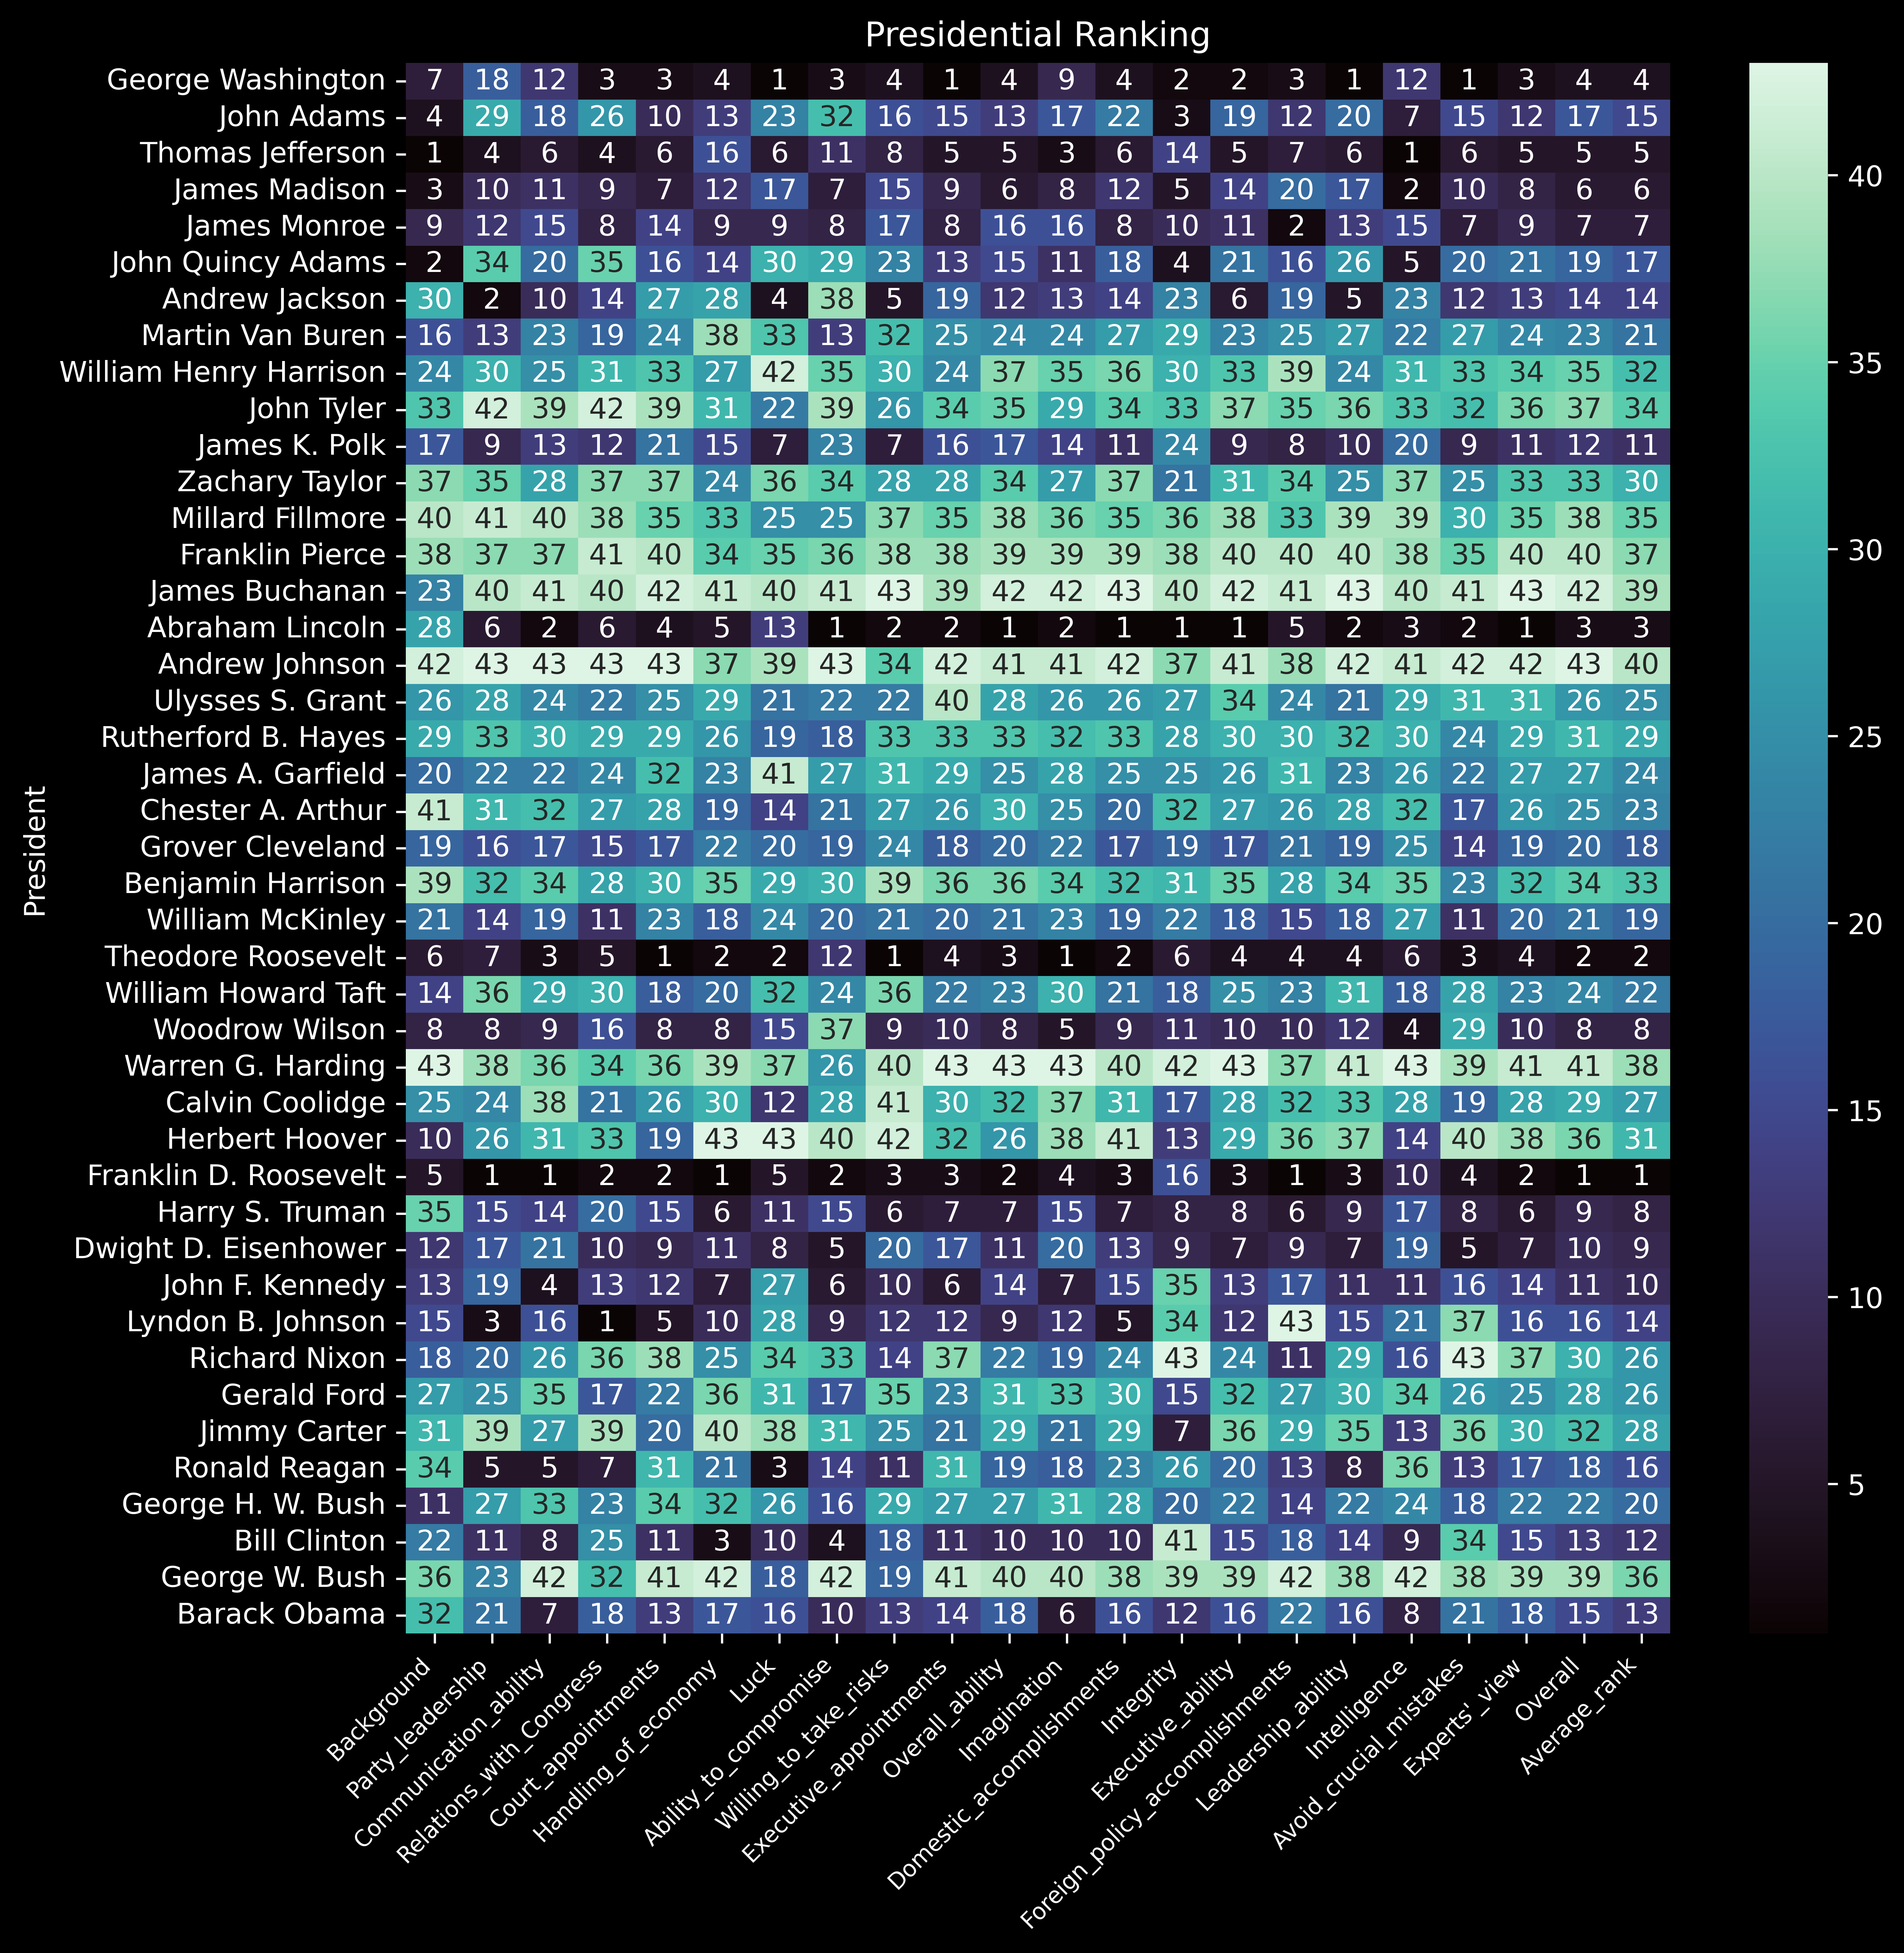

In [ ]:
fig, ax = plt.subplots(figsize=(10,10), dpi=600)
g = sns.heatmap((tweak_siena_pres(df)
  .set_index('President')
  .iloc[:,2:-1]
 ),annot=True, cmap='mako', ax=ax)
g.set_xticklabels(g.get_xticklabels(), rotation=45, fontsize=8, ha='right')
_ = plt.title('Presidential Ranking')


Sample allows us to take random samples from DF's, series and far more. We can use random_state to have reproducable random results and control the amount of results. I will continue to showcase some of the functionality.

In [ ]:
pres_df.sample(n=5, random_state=1)

Seq           President                  Party  Background  \
4    4       James Madison  Democratic-Republican           3   
3    3    Thomas Jefferson  Democratic-Republican           1   
25  26  Theodore Roosevelt             Republican           6   
41  42        Bill Clinton             Democratic          22   
18  18    Ulysses S. Grant             Republican          26   

    Party_leadership  Communication_ability  Relations_with_Congress  \
4                 10                     11                        9   
3                  4                      6                        4   
25                 7                      3                        5   
41                11                      8                       25   
18                28                     24                       22   

    Court_appointments  Handling_of_economy  Luck  ...  Integrity  \
4                    7                   12    17  ...          5   
3                    6                   16     6  ...         14   
25                   1                    2     2  ...          6   
41                  11                    3    10  ...         41   
18                  25                   29    21  ...         27   

    Executive_ability  Foreign_policy_accomplishments  Leadership_ability  \
4                  14                              20                  17   
3                   5                               7                   6   
25                  4                               4                   4   
41                 15                              18                  14   
18                 34                              24                  21   

    Intelligence  Avoid_crucial_mistakes  Experts'_view  Overall  \
4              2                      10              8        6   
3              1                       6              5        5   
25             6                       3              4        2   
41             9                      34             15       13   
18            29                      31             31       26   

    Average_rank  Quartile  
4              6       1st  
3              5       1st  
25             2       1st  
41            12       2nd  
18            25       3rd  

[5 rows x 26 columns]

In [ ]:
pres_df.sample?

In [ ]:
pres_df.Average_rank.dtype

dtype('uint8')

So with respect to sampling if we want to a weigh a column, higher values in that column will increase the likelihood of that row being sampled in our DF.

Since high rating means more lowly rated presidents, weighing that column now is more likely to return presidents with unfavorable ratings.

Additionally by using frac we sample a % of our dataset. Interestingly enough we are not limited to just sampling fractional amounts, and with weighing columns and adding replacement theres different weighs we can favor certain values being selected while still sampling randomly.

In [ ]:
pres_df.sample(frac=.33, weights='Average_rank', replace=False, random_state=1)

Seq          President           Party  Background  Party_leadership  \
18     18   Ulysses S. Grant      Republican          26                28   
30     31     Herbert Hoover      Republican          10                26   
1       1  George Washington     Independent           7                18   
14     14    Franklin Pierce      Democratic          38                37   
10     10         John Tyler     Independent          33                42   
8       8   Martin Van Buren      Democratic          16                13   
11     11      James K. Polk      Democratic          17                 9   
15     15     James Buchanan      Democratic          23                40   
17     17     Andrew Johnson  National Union          42                43   
22  22/24   Grover Cleveland      Democratic          19                16   
29     30    Calvin Coolidge      Republican          25                24   
12     12     Zachary Taylor            Whig          37                35   
38     39       Jimmy Carter      Democratic          31                39   
2       2         John Adams      Federalist           4                29   

    ...  Avoid_crucial_mistakes  Experts'_view  Overall  Average_rank  \
18  ...                      31             31       26            25   
30  ...                      40             38       36            31   
1   ...                       1              3        4             4   
14  ...                      35             40       40            37   
10  ...                      32             36       37            34   
8   ...                      27             24       23            21   
11  ...                       9             11       12            11   
15  ...                      41             43       42            39   
17  ...                      42             42       43            40   
22  ...                      14             19       20            18   
29  ...                      19             28       29            27   
12  ...                      25             33       33            30   
38  ...                      36             30       32            28   
2   ...                      15             12       17            15   

    Quartile  
18       3rd  
30       4th  
1        1st  
14       4th  
10       4th  
8        3rd  
11       2nd  
15       4th  
17       4th  
22       2nd  
29       3rd  
12       4th  
38       3rd  
2        2nd  

[14 rows x 26 columns]

Since in our average rank column, 1 is the best possible rating, taking the value one and dividing each rank by it provides us the same rankings but inverted and now the highest value means best possible rank as opposed to lowest (this is usually the cast in much data, higher is associater with bette, greater points..). It's not necessary to do this for every column since all other criteria is random, Average_rank in this case is what I want to favor. Now it is more likely a president in the top third of favorable ratings will be selected at random.

If we look at our results now the Presidents selected are nearly all in the 1st and 2nd quartile in our previous example they are predominantly in the 3rd and 4th

In [ ]:
testing = pres_df.sample(frac=.33, weights=1/pres_df.Average_rank, replace=False, random_state=1)

In [ ]:
testing

Seq              President                  Party  Background  \
24     25       William McKinley             Republican          21   
31     32  Franklin D. Roosevelt             Democratic           5   
1       1      George Washington            Independent           7   
16     16        Abraham Lincoln             Republican          28   
4       4          James Madison  Democratic-Republican           3   
3       3       Thomas Jefferson  Democratic-Republican           1   
6       6      John Quincy Adams  Democratic-Republican           2   
22  22/24       Grover Cleveland             Democratic          19   
26     27    William Howard Taft             Republican          14   
7       7         Andrew Jackson             Democratic          30   
34     35        John F. Kennedy             Democratic          13   
2       2             John Adams             Federalist           4   
32     33        Harry S. Truman             Democratic          35   
25     26     Theodore Roosevelt             Republican           6   

    Party_leadership  ...  Avoid_crucial_mistakes  Experts'_view  Overall  \
24                14  ...                      11             20       21   
31                 1  ...                       4              2        1   
1                 18  ...                       1              3        4   
16                 6  ...                       2              1        3   
4                 10  ...                      10              8        6   
3                  4  ...                       6              5        5   
6                 34  ...                      20             21       19   
22                16  ...                      14             19       20   
26                36  ...                      28             23       24   
7                  2  ...                      12             13       14   
34                19  ...                      16             14       11   
2                 29  ...                      15             12       17   
32                15  ...                       8              6        9   
25                 7  ...                       3              4        2   

    Average_rank  Quartile  
24            19       2nd  
31             1       1st  
1              4       1st  
16             3       1st  
4              6       1st  
3              5       1st  
6             17       2nd  
22            18       2nd  
26            22       3rd  
7             14       2nd  
34            10       1st  
2             15       2nd  
32             8       1st  
25             2       1st  

[14 rows x 26 columns]

In [ ]:
testing = pres_df.sample(frac=.33, weights=1/pres_df['Average_rank'], replace=False, random_state=1)


In [ ]:
pres_df.loc[:, 'Background':'Average_rank'].dtypes

Background                        uint8
Party_leadership                  uint8
Communication_ability             uint8
Relations_with_Congress           uint8
Court_appointments                uint8
Handling_of_economy               uint8
Luck                              uint8
Ability_to_compromise             uint8
Willing_to_take_risks             uint8
Executive_appointments            uint8
Overall_ability                   uint8
Imagination                       uint8
Domestic_accomplishments          uint8
Integrity                         uint8
Executive_ability                 uint8
Foreign_policy_accomplishments    uint8
Leadership_ability                uint8
Intelligence                      uint8
Avoid_crucial_mistakes            uint8
Experts'_view                     uint8
Overall                           uint8
Average_rank                      uint8
dtype: object

In [ ]:
scores = pres_df.loc[:, 'Background':'Average_rank']

In [ ]:
s1 = scores.iloc[:3, :4]
s1

Background  Party_leadership  Communication_ability  \
1           7                18                     12   
2           4                29                     18   
3           1                 4                      6   

   Relations_with_Congress  
1                        3  
2                       26  
3                        4

In [ ]:
s2 = scores.iloc[1:6,:5]
s2

Background  Party_leadership  Communication_ability  \
2           4                29                     18   
3           1                 4                      6   
4           3                10                     11   
5           9                12                     15   
6           2                34                     20   

   Relations_with_Congress  Court_appointments  
2                       26                  10  
3                        4                   6  
4                        9                   7  
5                        8                  14  
6                       35                  16

Notice the only the corresponding rows and columns we're added, the rest resulted in NaNs

In [ ]:
s1 + s2

Background  Communication_ability  Court_appointments  Party_leadership  \
1         NaN                    NaN                 NaN               NaN   
2         8.0                   36.0                 NaN              58.0   
3         2.0                   12.0                 NaN               8.0   
4         NaN                    NaN                 NaN               NaN   
5         NaN                    NaN                 NaN               NaN   
6         NaN                    NaN                 NaN               NaN   

   Relations_with_Congress  
1                      NaN  
2                     52.0  
3                      8.0  
4                      NaN  
5                      NaN  
6                      NaN

We can use concat to multiply our entries, setting our axis to 1 duplicates columns and their values and leaves the index the same.

In [ ]:
 pd.concat([scores.iloc[1:6, :5]]*2, axis=1)

Background  Party_leadership  Communication_ability  \
2           4                29                     18   
3           1                 4                      6   
4           3                10                     11   
5           9                12                     15   
6           2                34                     20   

   Relations_with_Congress  Court_appointments  Background  Party_leadership  \
2                       26                  10           4                29   
3                        4                   6           1                 4   
4                        9                   7           3                10   
5                        8                  14           9                12   
6                       35                  16           2                34   

   Communication_ability  Relations_with_Congress  Court_appointments  
2                     18                       26                  10  
3                      6                        4                   6  
4                     11                        9                   7  
5                     15                        8                  14  
6                     20                       35                  16

This works across both axis, the default axis is the index and will add duple the rows  (and their index values)

In [ ]:
 pd.concat([scores.iloc[1:6, :5]]*2, axis=0)

Background  Party_leadership  Communication_ability  \
2           4                29                     18   
3           1                 4                      6   
4           3                10                     11   
5           9                12                     15   
6           2                34                     20   
2           4                29                     18   
3           1                 4                      6   
4           3                10                     11   
5           9                12                     15   
6           2                34                     20   

   Relations_with_Congress  Court_appointments  
2                       26                  10  
3                        4                   6  
4                        9                   7  
5                        8                  14  
6                       35                  16  
2                       26                  10  
3                        4                   6  
4                        9                   7  
5                        8                  14  
6                       35                  16

In [ ]:
pd.concat([scores.iloc[1:6, :5]]*2, axis=0, sort=True)

Background  Communication_ability  Court_appointments  Party_leadership  \
2           4                     18                  10                29   
3           1                      6                   6                 4   
4           3                     11                   7                10   
5           9                     15                  14                12   
6           2                     20                  16                34   
2           4                     18                  10                29   
3           1                      6                   6                 4   
4           3                     11                   7                10   
5           9                     15                  14                12   
6           2                     20                  16                34   

   Relations_with_Congress  
2                       26  
3                        4  
4                        9  
5                        8  
6                       35  
2                       26  
3                        4  
4                        9  
5                        8  
6                       35

Corresponding rows and columns added again in this case we did this to already duped rows - the duplicated entries were each individually added to.

In [ ]:
scores.iloc[:3, :4] + pd.concat([scores.iloc[1:6, :5]]*2)

Background  Communication_ability  Court_appointments  Party_leadership  \
1         NaN                    NaN                 NaN               NaN   
2         8.0                   36.0                 NaN              58.0   
2         8.0                   36.0                 NaN              58.0   
3         2.0                   12.0                 NaN               8.0   
3         2.0                   12.0                 NaN               8.0   
4         NaN                    NaN                 NaN               NaN   
4         NaN                    NaN                 NaN               NaN   
5         NaN                    NaN                 NaN               NaN   
5         NaN                    NaN                 NaN               NaN   
6         NaN                    NaN                 NaN               NaN   
6         NaN                    NaN                 NaN               NaN   

   Relations_with_Congress  
1                      NaN  
2                     52.0  
2                     52.0  
3                      8.0  
3                      8.0  
4                      NaN  
4                      NaN  
5                      NaN  
5                      NaN  
6                      NaN  
6                      NaN

In [ ]:
 pd.concat([scores.iloc[1:6, :5]]*2).index.duplicated().any()

True

In [ ]:
pd.mod?

Object `pd.mod` not found.


Presidents with even ratings.

In [ ]:
pres_df.Average_rank.mod(2) == 0

In [ ]:
scores.iloc[:3, :4].dtypes

Background                 uint8
Party_leadership           uint8
Communication_ability      uint8
Relations_with_Congress    uint8
dtype: object

In [ ]:
tp_df = pd.DataFrame(scores)

Notice adding a df to itself or multiplying it by itself produces different results than using concat..

In [ ]:
tp_df = tp_df + tp_df

In [ ]:
tp_dfm = tp_df * tp_df

In [ ]:
s1 = pd.DataFrame(s1)
s1

Background  Party_leadership  Communication_ability  \
1           7                18                     12   
2           4                29                     18   
3           1                 4                      6   

   Relations_with_Congress  
1                        3  
2                       26  
3                        4

In [ ]:
s1 + s1

Background  Party_leadership  Communication_ability  \
1          14                36                     24   
2           8                58                     36   
3           2                 8                     12   

   Relations_with_Congress  
1                        6  
2                       52  
3                        8

If you do not use concat the row and columns remain the same and the corresponding values are updated by your mathematical operation.

In [ ]:
s1 * s1

Background  Party_leadership  Communication_ability  \
1          49                68                    144   
2          16                73                     68   
3           1                16                     36   

   Relations_with_Congress  
1                        9  
2                      164  
3                       16

In [ ]:
for label, content in pres_df.items():
  print(f'label: {label}')
  # print(f'content: {content}', sep='\n')

label: Seq
label: President
label: Party
label: Background
label: Party_leadership
label: Communication_ability
label: Relations_with_Congress
label: Court_appointments
label: Handling_of_economy
label: Luck
label: Ability_to_compromise
label: Willing_to_take_risks
label: Executive_appointments
label: Overall_ability
label: Imagination
label: Domestic_accomplishments
label: Integrity
label: Executive_ability
label: Foreign_policy_accomplishments
label: Leadership_ability
label: Intelligence
label: Avoid_crucial_mistakes
label: Experts'_view
label: Overall
label: Average_rank
label: Quartile


In [ ]:
for col_name, col in pres_df.items():
  print(col_name, type(col))
  break

Seq <class 'pandas.core.series.Series'>


In [ ]:
pres_df.iteritems?

In [ ]:
pres_df.items()

<generator object DataFrame.items at 0x7fe141f2b220>

In [ ]:
pres_df.items?

In [ ]:
s1

Background  Party_leadership  Communication_ability  \
1           7                18                     12   
2           4                29                     18   
3           1                 4                      6   

   Relations_with_Congress  
1                        3  
2                       26  
3                        4

In [ ]:
for label, content in s1.items():
  print(f'label: {label}')
  print(f'content: {content}', sep='\n')

label: Background
content: 1    7
2    4
3    1
Name: Background, dtype: uint8
label: Party_leadership
content: 1    18
2    29
3     4
Name: Party_leadership, dtype: uint8
label: Communication_ability
content: 1    12
2    18
3     6
Name: Communication_ability, dtype: uint8
label: Relations_with_Congress
content: 1     3
2    26
3     4
Name: Relations_with_Congress, dtype: uint8


In [ ]:
scores

Background  Party_leadership  Communication_ability  \
1            7                18                     12   
2            4                29                     18   
3            1                 4                      6   
4            3                10                     11   
5            9                12                     15   
6            2                34                     20   
7           30                 2                     10   
8           16                13                     23   
9           24                30                     25   
10          33                42                     39   
11          17                 9                     13   
12          37                35                     28   
13          40                41                     40   
14          38                37                     37   
15          23                40                     41   
16          28                 6                      2   
17          42                43                     43   
18          26                28                     24   
19          29                33                     30   
20          20                22                     22   
21          41                31                     32   
22          19                16                     17   
23          39                32                     34   
24          21                14                     19   
25           6                 7                      3   
26          14                36                     29   
27           8                 8                      9   
28          43                38                     36   
29          25                24                     38   
30          10                26                     31   
31           5                 1                      1   
32          35                15                     14   
33          12                17                     21   
34          13                19                      4   
35          15                 3                     16   
36          18                20                     26   
37          27                25                     35   
38          31                39                     27   
39          34                 5                      5   
40          11                27                     33   
41          22                11                      8   
42          36                23                     42   
43          32                21                      7   

    Relations_with_Congress  Court_appointments  Handling_of_economy  Luck  \
1                         3                   3                    4     1   
2                        26                  10                   13    23   
3                         4                   6                   16     6   
4                         9                   7                   12    17   
5                         8                  14                    9     9   
6                        35                  16                   14    30   
7                        14                  27                   28     4   
8                        19                  24                   38    33   
9                        31                  33                   27    42   
10                       42                  39                   31    22   
11                       12                  21                   15     7   
12                       37                  37                   24    36   
13                       38                  35                   33    25   
14                       41                  40                   34    35   
15                       40                  42                   41    40   
16                        6                   4                    5    13   
17                       43                  43                   37    39   
18 

In [ ]:
scores.sum(axis='columns') / len(scores.columns)

1      4.772727
2     16.272727
3      6.136364
4      9.727273
5     10.454545
6     18.590909
7     15.681818
8     24.181818
9     31.818182
10    34.454545
11    13.454545
12    31.409091
13    35.500000
14    38.136364
15    40.363636
16     4.272727
17    40.863636
18    26.681818
19    29.090909
20    26.363636
21    26.227273
22    19.000000
23    32.681818
24    19.318182
25     3.818182
26    24.863636
27    11.454545
28    39.227273
29    28.000000
30    31.727273
31     3.409091
32    11.454545
33    11.636364
34    13.227273
35    15.681818
36    27.500000
37    27.500000
38    28.909091
39    17.681818
40    24.000000
41    14.727273
42    36.636364
43    15.545455
dtype: float64

We can see by taking all the numeric columns and summing them together and then dividing them by n columns we get our average rating (we only need to add the rank methodoly). This can be done anywhere we have numeric columsn that are ordinal / categorical or represent values symetrically (high numbers all are all favorable or indicate a slower time, etc; we can often inverse columns as needed to make sure our vales ordinally are appropriate for group analysis).

In [ ]:
pres_df.iloc[30, :]

Seq                                                  32
President                         Franklin D. Roosevelt
Party                                        Democratic
Background                                            5
Party_leadership                                      1
Communication_ability                                 1
Relations_with_Congress                               2
Court_appointments                                    2
Handling_of_economy                                   1
Luck                                                  5
Ability_to_compromise                                 2
Willing_to_take_risks                                 3
Executive_appointments                                3
Overall_ability                                       2
Imagination                                           4
Domestic_accomplishments                              3
Integrity                                            16
Executive_ability                               

In [ ]:
pres_df.iloc[:, 1]

1          George Washington
2                 John Adams
3           Thomas Jefferson
4              James Madison
5               James Monroe
6          John Quincy Adams
7             Andrew Jackson
8           Martin Van Buren
9     William Henry Harrison
10                John Tyler
11             James K. Polk
12            Zachary Taylor
13          Millard Fillmore
14           Franklin Pierce
15            James Buchanan
16           Abraham Lincoln
17            Andrew Johnson
18          Ulysses S. Grant
19       Rutherford B. Hayes
20         James A. Garfield
21         Chester A. Arthur
22          Grover Cleveland
23         Benjamin Harrison
24          William McKinley
25        Theodore Roosevelt
26       William Howard Taft
27            Woodrow Wilson
28         Warren G. Harding
29           Calvin Coolidge
30            Herbert Hoover
31     Franklin D. Roosevelt
32           Harry S. Truman
33      Dwight D. Eisenhower
34           John F. Kennedy
35         Lyn

The lambda brings forth whatever position we specifies values in this case itll return every value in the 5th row without any aggregation.

In [ ]:
pres_df.agg(['count', 'size', 'sum', lambda col: col.loc[5]])

Seq  \
count                                                    43   
size                                                     43   
sum       12345678910111213141516171819202122/2423252627...   
<lambda>                                                  5   

                                                  President  \
count                                                    43   
size                                                     43   
sum       George WashingtonJohn AdamsThomas JeffersonJam...   
<lambda>                                       James Monroe   

                          Party Background Party_leadership  ...  \
count                        43         43               43  ...   
size                         43         43               43  ...   
sum                         NaN        946              946  ...   
<lambda>  Democratic-Republican          9               12  ...   

         Avoid_crucial_mistakes Experts'_view Overall Average_rank Quartile  
count                        43            43      43           43       43  
size                         43            43      43           43       43  
sum                         946           946     946          868      NaN  
<lambda>                      7             9       7            7      1st  

[4 rows x 26 columns]

We can use any name we want here the key thing is that loc is returning the 5th index position (5th row)

In [ ]:
pres_df.agg(['count', 'size', 'sum', lambda x: x.loc[5]])

Seq  \
count                                                    43   
size                                                     43   
sum       12345678910111213141516171819202122/2423252627...   
<lambda>                                                  5   

                                                  President  \
count                                                    43   
size                                                     43   
sum       George WashingtonJohn AdamsThomas JeffersonJam...   
<lambda>                                       James Monroe   

                          Party Background Party_leadership  \
count                        43         43               43   
size                         43         43               43   
sum                         NaN        946              946   
<lambda>  Democratic-Republican          9               12   

         Communication_ability Relations_with_Congress Court_appointments  \
count                       43                      43                 43   
size                        43                      43                 43   
sum                        946                     946                946   
<lambda>                    15                       8                 14   

         Handling_of_economy Luck  ... Integrity Executive_ability  \
count                     43   43  ...        43                43   
size                      43   43  ...        43                43   
sum                      946  946  ...       946               946   
<lambda>                   9    9  ...        10                11   

         Foreign_policy_accomplishments Leadership_ability Intelligence  \
count                                43                 43           43   
size                                 43                 43           43   
sum                                 946                946          946   
<lambda>                              2                 13           15   

         Avoid_crucial_mistakes Experts'_view Overall Average_rank Quartile  
count                        43            43      43           43       43  
size                         43            43      43           43       43  
sum                         946           946     946          868      NaN  
<lambda>                      7             9       7            7      1st  

[4 rows x 26 columns]

In [ ]:
pres_df.agg({'Luck': ['count', 'mean', 'std'], 'Overall': ['count', 'mean', 'std']})

Luck    Overall
count  43.000000  43.000000
mean   22.000000  22.000000
std    12.556539  12.556539

In [ ]:
pres_df.agg(intel_count = ('Intelligence', 'count'), com_avg = ('Communication_ability', 'meandf'))

Intelligence  Communication_ability
intel_count          43.0                    NaN
com_avg               NaN                   22.0

In [ ]:
pres_df.agg(intel_count = ('Intelligence', 'count'), intel_max = ('Intelligence', 'max'))

Intelligence
intel_count           43
intel_max             43

In [ ]:
pres_df.describe()

Background  Party_leadership  Communication_ability  \
count   43.000000         43.000000              43.000000   
mean    22.000000         22.000000              22.000000   
std     12.556539         12.556539              12.556539   
min      1.000000          1.000000               1.000000   
25%     11.500000         11.500000              11.500000   
50%     22.000000         22.000000              22.000000   
75%     32.500000         32.500000              32.500000   
max     43.000000         43.000000              43.000000   

       Relations_with_Congress  Court_appointments  ...  Intelligence  \
count                43.000000           43.000000  ...     43.000000   
mean                 22.000000           22.000000  ...     22.000000   
std                  12.556539           12.556539  ...     12.556539   
min                   1.000000            1.000000  ...      1.000000   
25%                  11.500000           11.500000  ...     11.500000   
50%                  22.000000           22.000000  ...     22.000000   
75%                  32.500000           32.500000  ...     32.500000   
max                  43.000000           43.000000  ...     43.000000   

       Avoid_crucial_mistakes  Experts'_view    Overall  Average_rank  
count               43.000000      43.000000  43.000000     43.000000  
mean                22.000000      22.000000  22.000000     20.186047  
std                 12.556539      12.556539  12.556539     11.500012  
min                  1.000000       1.000000   1.000000      1.000000  
25%                 11.500000      11.500000  11.500000     10.500000  
50%                 22.000000      22.000000  22.000000     20.000000  
75%                 32.500000      32.500000  32.500000     29.500000  
max                 43.000000      43.000000  43.000000     40.000000  

[8 rows x 22 columns]

Describe by default only selects numeric columns.

In [ ]:
pres_df.describe().columns

Index(['Background', 'Party_leadership', 'Communication_ability',
       'Relations_with_Congress', 'Court_appointments', 'Handling_of_economy',
       'Luck', 'Ability_to_compromise', 'Willing_to_take_risks',
       'Executive_appointments', 'Overall_ability', 'Imagination',
       'Domestic_accomplishments', 'Integrity', 'Executive_ability',
       'Foreign_policy_accomplishments', 'Leadership_ability', 'Intelligence',
       'Avoid_crucial_mistakes', 'Experts'_view', 'Overall', 'Average_rank'],
      dtype='object')

In [ ]:
pres_df.columns

Index(['Seq', 'President', 'Party', 'Background', 'Party_leadership',
       'Communication_ability', 'Relations_with_Congress',
       'Court_appointments', 'Handling_of_economy', 'Luck',
       'Ability_to_compromise', 'Willing_to_take_risks',
       'Executive_appointments', 'Overall_ability', 'Imagination',
       'Domestic_accomplishments', 'Integrity', 'Executive_ability',
       'Foreign_policy_accomplishments', 'Leadership_ability', 'Intelligence',
       'Avoid_crucial_mistakes', 'Experts'_view', 'Overall', 'Average_rank',
       'Quartile'],
      dtype='object')

In [ ]:
pres_df.describe?

In [ ]:
pres_df.select_dtypes('number')

Background  Party_leadership  Communication_ability  \
1            7                18                     12   
2            4                29                     18   
3            1                 4                      6   
4            3                10                     11   
5            9                12                     15   
6            2                34                     20   
7           30                 2                     10   
8           16                13                     23   
9           24                30                     25   
10          33                42                     39   
11          17                 9                     13   
12          37                35                     28   
13          40                41                     40   
14          38                37                     37   
15          23                40                     41   
16          28                 6                      2   
17          42                43                     43   
18          26                28                     24   
19          29                33                     30   
20          20                22                     22   
21          41                31                     32   
22          19                16                     17   
23          39                32                     34   
24          21                14                     19   
25           6                 7                      3   
26          14                36                     29   
27           8                 8                      9   
28          43                38                     36   
29          25                24                     38   
30          10                26                     31   
31           5                 1                      1   
32          35                15                     14   
33          12                17                     21   
34          13                19                      4   
35          15                 3                     16   
36          18                20                     26   
37          27                25                     35   
38          31                39                     27   
39          34                 5                      5   
40          11                27                     33   
41          22                11                      8   
42          36                23                     42   
43          32                21                      7   

    Relations_with_Congress  Court_appointments  Handling_of_economy  Luck  \
1                         3                   3                    4     1   
2                        26                  10                   13    23   
3                         4                   6                   16     6   
4                         9                   7                   12    17   
5                         8                  14                    9     9   
6                        35                  16                   14    30   
7                        14                  27                   28     4   
8                        19                  24                   38    33   
9                        31                  33                   27    42   
10                       42                  39                   31    22   
11                       12                  21                   15     7   
12                       37                  37                   24    36   
13                       38                  35                   33    25   
14                       41                  40                   34    35   
15                       40                  42                   41    40   
16                        6                   4                    5    13   
17                       43                  43                   37    39   
18 

This looks at each row (index position) and then takes the max value from the numeric columns and subtracts the min value from the corresponding index position. This gives us the spread so to speak.

In [ ]:
(pres_df
.select_dtypes('number')
.pipe(lambda df_:df_.max(axis='columns') - df_.min(axis='columns'))
)

In [ ]:
(pres_df
 .select_dtypes('number')
 .apply(lambda x: x.max() - x.min(), axis='columns')
 )

In [ ]:
%%timeit
(pres_df
.select_dtypes('number')
.pipe(lambda df_:df_.max(axis='columns') - df_.min(axis='columns'))
)

2.63 ms ± 428 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Using Pipe as opposed to apply takes less than 1/3 of the time!

In [ ]:
%%timeit
(pres_df
 .select_dtypes('number')
 .apply(lambda x: x.max() - x.min(), axis='columns')
 )

8.01 ms ± 4.18 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
(pres_df
 .select_dtypes('number')
 .pipe(lambda x: x.max(axis='columns') - x.min(axis='columns'))
 )

In [ ]:
import io
billing_data ='''cancel_date,period_start,start_date,end_date,rev,sum_payments
 12/1/2019,1/1/2020,12/15/2019,5/15/2020,999,50
 ,1/1/2020,12/15/2019,5/15/2020,999,50
 ,1/1/2020,12/15/2019,5/15/2020,999,1950
 1/20/2020,1/1/2020,12/15/2019,5/15/2020,499,0
 ,1/1/2020,12/24/2019,5/24/2020,699,100
 ,1/1/2020,11/29/2019,4/29/2020,799,250
 ,1/1/2020,1/15/2020,4/29/2020,799,250'''

In [ ]:
billing_data

'cancel_date,period_start,start_date,end_date,rev,sum_payments\n 12/1/2019,1/1/2020,12/15/2019,5/15/2020,999,50\n ,1/1/2020,12/15/2019,5/15/2020,999,50\n ,1/1/2020,12/15/2019,5/15/2020,999,1950\n 1/20/2020,1/1/2020,12/15/2019,5/15/2020,499,0\n ,1/1/2020,12/24/2019,5/24/2020,699,100\n ,1/1/2020,11/29/2019,4/29/2020,799,250\n ,1/1/2020,1/15/2020,4/29/2020,799,250'

In [ ]:
 bill_df = pd.read_csv(io.StringIO(billing_data))
 bill_df

cancel_date period_start  start_date   end_date  rev  sum_payments
0   12/1/2019     1/1/2020  12/15/2019  5/15/2020  999            50
1                 1/1/2020  12/15/2019  5/15/2020  999            50
2                 1/1/2020  12/15/2019  5/15/2020  999          1950
3   1/20/2020     1/1/2020  12/15/2019  5/15/2020  499             0
4                 1/1/2020  12/24/2019  5/24/2020  699           100
5                 1/1/2020  11/29/2019  4/29/2020  799           250
6                 1/1/2020   1/15/2020  4/29/2020  799           250

In [ ]:
bill_df = pd.read_csv(io.StringIO(billing_data), parse_dates=['cancel_date', 'period_start','start_date', 'end_date'])
bill_df.dtypes

cancel_date             object
period_start    datetime64[ns]
start_date      datetime64[ns]
end_date        datetime64[ns]
rev                      int64
sum_payments             int64
dtype: object

In [ ]:
bill_df.cancel_date

0     12/1/2019
1              
2              
3     1/20/2020
4              
5              
6              
Name: cancel_date, dtype: object

In [ ]:
bill_df.cancel_date = pd.to_datetime(bill_df.cancel_date, errors='coerce')

In [ ]:
def calc_unbilled_rec(vals):
  cancel_date, period_start, start_date, end_date, rev, \
      sum_payments = vals
  if cancel_date < period_start:
    return
  if start_date < period_start and end_date > period_start:
    if rev > sum_payments:
      return rev - sum_payments
  else:
    return

In [ ]:
bill_df.apply(calc_unbilled_rec, axis=1)

0      NaN
1    949.0
2      NaN
3    499.0
4    599.0
5    549.0
6      NaN
dtype: float64

this code runs potentially over 200x faster (vectorized) but with a limited small data set it is actually slower than using .apply (not by much, always build with scale in mind)

Code that is slower on small data sets can be faster on larger datasets.

Important to always check your code on the dataset sizes it will be running on when determining what is optimal.

In [ ]:
pd.Series(np.select([
(bill_df.cancel_date < bill_df.period_start), # 1
 ((bill_df.start_date < bill_df.period_start) & # 2
(bill_df.end_date > bill_df.period_start) &
(bill_df.rev > bill_df.sum_payments)), ((bill_df.start_date < bill_df.period_start) & # 3
(bill_df.end_date > bill_df.period_start) &
(bill_df.rev <= bill_df.sum_payments)) ],
[np.nan, bill_df.rev - bill_df.sum_payments, 0], # 1, 2, 3
np.nan)) # default

0      NaN
1    949.0
2      0.0
3    499.0
4    599.0
5    549.0
6      NaN
dtype: float64

In [ ]:
for idx, row in pres_df.iterrows():
  print(idx, type(row))
  break

1 <class 'pandas.core.series.Series'>


In [ ]:
for tup in pres_df.itertuples():
  print(tup[0], tup.Party)
  break

1 Independent


In [ ]:
pres_df.itertuples()

In [ ]:
pres_df.columns

Index(['Seq', 'President', 'Party', 'Background', 'Party_leadership',
       'Communication_ability', 'Relations_with_Congress',
       'Court_appointments', 'Handling_of_economy', 'Luck',
       'Ability_to_compromise', 'Willing_to_take_risks',
       'Executive_appointments', 'Overall_ability', 'Imagination',
       'Domestic_accomplishments', 'Integrity', 'Executive_ability',
       'Foreign_policy_accomplishments', 'Leadership_ability', 'Intelligence',
       'Avoid_crucial_mistakes', 'Experts'_view', 'Overall', 'Average_rank',
       'Quartile'],
      dtype='object')

In [ ]:
num_cols = pres_df.select_dtypes(include=['number']).columns
num_cols

Index(['Background', 'Party_leadership', 'Communication_ability',
       'Relations_with_Congress', 'Court_appointments', 'Handling_of_economy',
       'Luck', 'Ability_to_compromise', 'Willing_to_take_risks',
       'Executive_appointments', 'Overall_ability', 'Imagination',
       'Domestic_accomplishments', 'Integrity', 'Executive_ability',
       'Foreign_policy_accomplishments', 'Leadership_ability', 'Intelligence',
       'Avoid_crucial_mistakes', 'Experts'_view', 'Overall', 'Average_rank'],
      dtype='object')

In [ ]:
store = {}
for i in num_cols:
  store[i] = [pres_df[i].max(), pres_df[i].min()]
print(store)

{'Background': [43, 1], 'Party_leadership': [43, 1], 'Communication_ability': [43, 1], 'Relations_with_Congress': [43, 1], 'Court_appointments': [43, 1], 'Handling_of_economy': [43, 1], 'Luck': [43, 1], 'Ability_to_compromise': [43, 1], 'Willing_to_take_risks': [43, 1], 'Executive_appointments': [43, 1], 'Overall_ability': [43, 1], 'Imagination': [43, 1], 'Domestic_accomplishments': [43, 1], 'Integrity': [43, 1], 'Executive_ability': [43, 1], 'Foreign_policy_accomplishments': [43, 1], 'Leadership_ability': [43, 1], 'Intelligence': [43, 1], 'Avoid_crucial_mistakes': [43, 1], "Experts'_view": [43, 1], 'Overall': [43, 1], 'Average_rank': [40, 1]}


In [ ]:
store = [(i, pres_df[i].max(), pres_df[i].min()) for i in num_cols]
store

[('Background', 43, 1),
 ('Party_leadership', 43, 1),
 ('Communication_ability', 43, 1),
 ('Relations_with_Congress', 43, 1),
 ('Court_appointments', 43, 1),
 ('Handling_of_economy', 43, 1),
 ('Luck', 43, 1),
 ('Ability_to_compromise', 43, 1),
 ('Willing_to_take_risks', 43, 1),
 ('Executive_appointments', 43, 1),
 ('Overall_ability', 43, 1),
 ('Imagination', 43, 1),
 ('Domestic_accomplishments', 43, 1),
 ('Integrity', 43, 1),
 ('Executive_ability', 43, 1),
 ('Foreign_policy_accomplishments', 43, 1),
 ('Leadership_ability', 43, 1),
 ('Intelligence', 43, 1),
 ('Avoid_crucial_mistakes', 43, 1),
 ("Experts'_view", 43, 1),
 ('Overall', 43, 1),
 ('Average_rank', 40, 1)]

In [ ]:
store = {i: [pres_df[i].max(), pres_df[i].min()] for i in num_cols}
store

{'Background': [43, 1],
 'Party_leadership': [43, 1],
 'Communication_ability': [43, 1],
 'Relations_with_Congress': [43, 1],
 'Court_appointments': [43, 1],
 'Handling_of_economy': [43, 1],
 'Luck': [43, 1],
 'Ability_to_compromise': [43, 1],
 'Willing_to_take_risks': [43, 1],
 'Executive_appointments': [43, 1],
 'Overall_ability': [43, 1],
 'Imagination': [43, 1],
 'Domestic_accomplishments': [43, 1],
 'Integrity': [43, 1],
 'Executive_ability': [43, 1],
 'Foreign_policy_accomplishments': [43, 1],
 'Leadership_ability': [43, 1],
 'Intelligence': [43, 1],
 'Avoid_crucial_mistakes': [43, 1],
 "Experts'_view": [43, 1],
 'Overall': [43, 1],
 'Average_rank': [40, 1]}

In [ ]:
%%timeit
store = {i: [pres_df[i].max(), pres_df[i].min()] for i in num_cols}

In [ ]:
%%timeit
store = [(i, pres_df[i].max(), pres_df[i].min()) for i in num_cols]

The slowest run took 5.07 times longer than the fastest. This could mean that an intermediate result is being cached.
4.73 ms ± 2.89 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
pres_df[num_cols].apply(['max', 'min'], axis=0).T

max  min
Background                       43    1
Party_leadership                 43    1
Communication_ability            43    1
Relations_with_Congress          43    1
Court_appointments               43    1
Handling_of_economy              43    1
Luck                             43    1
Ability_to_compromise            43    1
Willing_to_take_risks            43    1
Executive_appointments           43    1
Overall_ability                  43    1
Imagination                      43    1
Domestic_accomplishments         43    1
Integrity                        43    1
Executive_ability                43    1
Foreign_policy_accomplishments   43    1
Leadership_ability               43    1
Intelligence                     43    1
Avoid_crucial_mistakes           43    1
Experts'_view                    43    1
Overall                          43    1
Average_rank                     40    1

In [ ]:
pres_df.apply?

In [ ]:
pres_df.describe()

Background  Party_leadership  Communication_ability  \
count   43.000000         43.000000              43.000000   
mean    22.000000         22.000000              22.000000   
std     12.556539         12.556539              12.556539   
min      1.000000          1.000000               1.000000   
25%     11.500000         11.500000              11.500000   
50%     22.000000         22.000000              22.000000   
75%     32.500000         32.500000              32.500000   
max     43.000000         43.000000              43.000000   

       Relations_with_Congress  Court_appointments  Handling_of_economy  \
count                43.000000           43.000000            43.000000   
mean                 22.000000           22.000000            22.000000   
std                  12.556539           12.556539            12.556539   
min                   1.000000            1.000000             1.000000   
25%                  11.500000           11.500000            11.500000   
50%                  22.000000           22.000000            22.000000   
75%                  32.500000           32.500000            32.500000   
max                  43.000000           43.000000            43.000000   

            Luck  Ability_to_compromise  Willing_to_take_risks  \
count  43.000000              43.000000              43.000000   
mean   22.000000              22.000000              22.000000   
std    12.556539              12.556539              12.556539   
min     1.000000               1.000000               1.000000   
25%    11.500000              11.500000              11.500000   
50%    22.000000              22.000000              22.000000   
75%    32.500000              32.500000              32.500000   
max    43.000000              43.000000              43.000000   

       Executive_appointments  ...  Domestic_accomplishments  Integrity  \
count               43.000000  ...                 43.000000  43.000000   
mean                22.000000  ...                 22.000000  22.000000   
std                 12.556539  ...                 12.556539  12.556539   
min                  1.000000  ...                  1.000000   1.000000   
25%                 11.500000  ...                 11.500000  11.500000   
50%                 22.000000  ...                 22.000000  22.000000   
75%                 32.500000  ...                 32.500000  32.500000   
max                 43.000000  ...                 43.000000  43.000000   

       Executive_ability  Foreign_policy_accomplishments  Leadership_ability  \
count          43.000000                       43.000000           43.000000   
mean           22.000000                       22.000000           22.000000   
std            12.556539                       12.556539           12.556539   
min             1.000000                        1.000000            1.000000   
25%            11.500000                       11.500000           11.500000   
50%            22.000000                       22.000000           22.000000   
75%            32.500000                       32.500000           32.500000   
max            43.000000                       43.000000           43.000000   

       Intelligence  Avoid_crucial_mistakes  Experts'_view    Overall  \
count     43.000000               43.000000      43.000000  43.000000   
mean      22.000000               22.000000      22.000000  22.000000   
std       12.556539               12.556539      12.556539  12.556539   
min        1.000000                1.000000       1.000000   1.000000   
25%       11.500000               11.500000      11.500000  11.500000   
50%       22.000000               22.000000      22.000000  22.000000   
75%       32.500000               32.500000      32.500000  32.500000   
max       43.000000               43.000000      43.000000  43.000000   

       Average_rank  
count     43.000000  
mean      20.186047  
std       11.500012  
min        1.000000  
25%       10

In [ ]:
pres_df.agg(['min', 'max'], axis=0).T

min             max
Seq                                           1               9
President                       Abraham Lincoln  Zachary Taylor
Background                                    1              43
Party_leadership                              1              43
Communication_ability                         1              43
Relations_with_Congress                       1              43
Court_appointments                            1              43
Handling_of_economy                           1              43
Luck                                          1              43
Ability_to_compromise                         1              43
Willing_to_take_risks                         1              43
Executive_appointments                        1              43
Overall_ability                               1              43
Imagination                                   1              43
Domestic_accomplishments                      1              43
Integrity                                     1              43
Executive_ability                             1              43
Foreign_policy_accomplishments                1              43
Leadership_ability                            1              43
Intelligence                                  1              43
Avoid_crucial_mistakes                        1              43
Experts'_view                                 1              43
Overall                                       1              43
Average_rank                                  1              40
Quartile                                    1st             4th

In [ ]:
pres_df.memory_usage(deep=True).sum()

7992

In [ ]:
df.columns

Index(['Seq.', 'President', 'Party', 'Bg', 'PL', 'CAb', 'RC', 'CAp', 'HE', 'L',
       'AC', 'WR', 'EAp', 'OA', 'Im', 'DA', 'Int', 'EAb', 'FPA', 'LA', 'IQ',
       'AM', 'EV', 'O'],
      dtype='object')

In [ ]:
df.memory_usage(deep=True).sum()

13815

42% reduction in memory space between original dataframe and optimized df

In [ ]:
(7992 - 13815) / 13815

-0.4214983713355049

In [ ]:
7

9394.2

In [ ]:
pd.DataFrame.iinfo?

Object `pd.DataFrame.iinfo` not found.
